In [1]:
!git clone https://github.com/Siddheshdumre/Capstone-P59.git
%cd Capstone-P59
!ls


Cloning into 'Capstone-P59'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 241 (delta 38), reused 236 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (241/241), 24.58 MiB | 27.12 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Filtering content: 100% (9/9), 208.95 MiB | 69.86 MiB/s, done.
/content/Capstone-P59
adult-20251017T181359Z-1-001.zip  generate_german_test_set.py
attacked			  german_credit_risk-20251017T181409Z-1-001.zip
attacks				  prepare_all_test_data.py
attack_simulation.py		  proposed
Capstone-P59			  README.md
data				  train_adult.ipynb
downloads			  train_compas.ipynb
explainers			  train_german.ipynb
generate_adult_test_set.py


In [2]:
!pip install shap lime joblib openpyxl matplotlib pandas scikit-learn xlrd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=da73774857e3d51bf001872ff8824b5d1c125fd7e262f03f458cd7e77ea756ff
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [3]:
import os
import numpy as np
import pandas as pd
# etc...


In [4]:
import sys
sys.path.append('/content/Capstone-P59')  # so python can see the repo
sys.path.append('/content/Capstone-P59/explainers')


In [5]:
# make sure current dir is repo root (adjust path if needed)
%cd /content/Capstone-P59    # or the path where you cloned the repo

import sys, os
sys.path.append(os.getcwd())            # repo root
sys.path.append(os.path.join(os.getcwd(), "explainers"))  # optional

# quick listing
print("explainer packages:")
print(os.listdir("explainers"))

print("\nfiles in explainers/lime:")
print(os.listdir("explainers/lime"))

print("\nfiles in explainers/kernelshap:")
print(os.listdir("explainers/kernelshap"))


[Errno 2] No such file or directory: '/content/Capstone-P59 # or the path where you cloned the repo'
/content/Capstone-P59
explainer packages:
['.DS_Store', '__init__.py', '__pycache__', 'kernelshap', 'lime']

files in explainers/lime:
['discretize.py', 'lime_tabular.py', 'lime_base.py', '.DS_Store', 'req.py', 'explanation.py', '__init__.py', 'exceptions.py', '__pycache__']

files in explainers/kernelshap:
['_kernel.py', 'maskers', 'links.py', '_kernel_lib.pyx', 'req.py', 'utils', '_explainer.py', '_explanation.py', '_serializable.py', '__init__.py', 'plots', '__pycache__']


In [6]:
import ast, glob

def find_classes_in_file(pyfile):
    try:
        with open(pyfile, "r", encoding="utf-8") as f:
            tree = ast.parse(f.read(), filename=pyfile)
    except Exception as e:
        return []
    classes = [n.name for n in tree.body if isinstance(n, ast.ClassDef)]
    funcs = [n.name for n in tree.body if isinstance(n, ast.FunctionDef)]
    return classes, funcs

mod_files = glob.glob("explainers/lime/*.py") + glob.glob("explainers/kernelshap/*.py")
for f in mod_files:
    classes, funcs = find_classes_in_file(f)
    if classes or funcs:
        print(f"\n{f}")
        if classes:
            print("  classes:", classes)
        if funcs:
            print("  funcs:", funcs)



explainers/lime/discretize.py
  classes: ['BaseDiscretizer', 'StatsDiscretizer', 'QuartileDiscretizer', 'DecileDiscretizer', 'EntropyDiscretizer']

explainers/lime/lime_tabular.py
  classes: ['TableDomainMapper', 'LimeTabularExplainer', 'RecurrentTabularExplainer']

explainers/lime/lime_base.py
  classes: ['LimeBase']

explainers/lime/explanation.py
  classes: ['DomainMapper', 'Explanation']
  funcs: ['id_generator']

explainers/lime/__init__.py
  funcs: ['_explanation']

explainers/lime/exceptions.py
  classes: ['LimeError']

explainers/kernelshap/_kernel.py
  classes: ['KernelExplainer']

explainers/kernelshap/links.py
  funcs: ['identity', '_identity_inverse', 'logit', '_logit_inverse']

explainers/kernelshap/_explainer.py
  classes: ['Explainer']
  funcs: ['pack_values']

explainers/kernelshap/_explanation.py
  classes: ['OpHistoryItem', 'MetaExplanation', 'Explanation', 'Cohorts']
  funcs: ['group_features', 'compute_output_dims', 'is_1d', '_compute_shape', '_auto_cohorts', 'list

In [7]:
# Try common imports from those local packages.
# This cell won't crash the notebook; it tries several likely names and prints what works.

import importlib

candidates = [
    ("explainers.lime.lime_tabular", "LimeTabularExplainer"),
    ("explainers.lime.lime_base", "LimeTabularExplainer"),
    ("explainers.lime.lime_tabular", "LimeExplainer"),
    ("explainers.kernelshap._explainer", "KernelExplainer"),
    ("explainers.kernelshap._explainer", "KernelShapExplainer"),
    ("explainers.kernelshap", "_explainer"),
]

found = {}
for modname, objname in candidates:
    try:
        m = importlib.import_module(modname)
        if hasattr(m, objname):
            found[(modname, objname)] = getattr(m, objname)
            print("OK import:", modname, objname)
        else:
            # show top-level names in module to help debug
            print("Module loaded but", objname, "not found in", modname, " — available names:", [n for n in dir(m) if not n.startswith("_")][:30])
    except Exception as e:
        print("Import failed:", modname, e)

# print summary
print("\nFound classes:", list(found.keys()))


OK import: explainers.lime.lime_tabular LimeTabularExplainer
Module loaded but LimeTabularExplainer not found in explainers.lime.lime_base  — available names: ['LimeBase', 'Ridge', 'check_random_state', 'lars_path', 'np', 'sp']
Module loaded but LimeExplainer not found in explainers.lime.lime_tabular  — available names: ['BaseDiscretizer', 'DecileDiscretizer', 'EntropyDiscretizer', 'LimeTabularExplainer', 'QuartileDiscretizer', 'RecurrentTabularExplainer', 'StatsDiscretizer', 'TableDomainMapper', 'check_random_state', 'collections', 'copy', 'explanation', 'json', 'lime_base', 'norm', 'np', 'partial', 'sklearn', 'sp', 'warnings']
Import failed: explainers.kernelshap._explainer No module named 'src'
Import failed: explainers.kernelshap._explainer No module named 'src'
Import failed: explainers.kernelshap No module named 'src'

Found classes: [('explainers.lime.lime_tabular', 'LimeTabularExplainer')]


In [8]:
# Run this in Colab (Python cell). Assumes repo root is current dir.
import importlib, os, sys
sys.path.append(os.getcwd())                    # repo root
sys.path.append(os.path.join(os.getcwd(), "explainers"))

# import local Lime
from explainers.lime.lime_tabular import LimeTabularExplainer
print("Using local LimeTabularExplainer from explainers.lime.lime_tabular")

# Try to import local kernelshap; if it fails, fallback to installed shap
use_local_kernelshap = False
try:
    m = importlib.import_module("explainers.kernelshap._explainer")
    print("Loaded local kernelshap._explainer module")
    # you can inspect available names with:
    print([n for n in dir(m) if not n.startswith("_")][:50])
    # If a KernelExplainer class exists there, you can set use_local_kernelshap = True
    if hasattr(m, "KernelExplainer") or hasattr(m, "KernelShapExplainer"):
        use_local_kernelshap = True
except Exception as e:
    print("Local kernelshap import failed (expected). Falling back to installed shap:", e)
    use_local_kernelshap = False

if not use_local_kernelshap:
    import shap
    KernelExplainer = shap.KernelExplainer
    print("Using shap.KernelExplainer from installed shap package")
else:
    # import the class from the local module dynamically (if exists)
    if hasattr(m, "KernelExplainer"):
        KernelExplainer = getattr(m, "KernelExplainer")
    elif hasattr(m, "KernelShapExplainer"):
        KernelExplainer = getattr(m, "KernelShapExplainer")
    else:
        import shap
        KernelExplainer = shap.KernelExplainer
        print("Could not find class in local module; using shap.KernelExplainer")


Using local LimeTabularExplainer from explainers.lime.lime_tabular
Local kernelshap import failed (expected). Falling back to installed shap: No module named 'src'
Using shap.KernelExplainer from installed shap package


In [9]:
# Metric helpers (paste if you haven't defined them in this session)
import numpy as np
from scipy.stats import kendalltau
from sklearn.metrics import accuracy_score

def gaussian_perturb(x, sigma=0.05):
    return np.random.normal(0, sigma, size=x.shape)

def compute_infidelity(model, X_df, explanations, perturb_fn, n_samples=30, max_samples=200):
    X_vals = X_df.values.astype(float)
    N = min(len(X_vals), explanations.shape[0], max_samples)
    infs = []
    for i in range(N):
        x = X_vals[i].astype(float)
        exp = explanations[i].astype(float)
        svals = []
        for _ in range(n_samples):
            delta = perturb_fn(x)
            try:
                fx = float(model.predict_proba([x])[0][1])
                fxp = float(model.predict_proba([x - delta])[0][1])
            except Exception:
                fx = float(model.predict([x])[0])
                fxp = float(model.predict([x - delta])[0])
            svals.append((np.dot(delta, exp) - (fx - fxp))**2)
        infs.append(np.mean(svals))
    return float(np.mean(infs)), np.array(infs)

def compute_rank_consistency(expl_array, sample_limit=100):
    n = min(expl_array.shape[0], sample_limit)
    taus = []
    for i in range(n-1):
        tau, _ = kendalltau(expl_array[i], expl_array[i+1])
        if not np.isnan(tau):
            taus.append(tau)
    return float(np.mean(taus)) if len(taus)>0 else np.nan, np.array(taus)

def compute_roar_kar(model_class, X_train, y_train, X_test, y_test, feature_importance, top_ps=[0.1,0.2,0.3]):
    results = {"ROAR":{}, "KAR":{}}
    fimp = np.array(feature_importance)
    n_features = X_train.shape[1]
    ranked_idx = np.argsort(-fimp)
    for p in top_ps:
        k = max(1, int(p * n_features))
        top_idx = ranked_idx[:k]
        # ROAR
        Xtr_roar = np.delete(X_train, top_idx, axis=1)
        Xte_roar = np.delete(X_test, top_idx, axis=1)
        m1 = model_class()
        m1.fit(Xtr_roar, y_train)
        acc_roar = accuracy_score(y_test, m1.predict(Xte_roar))
        results["ROAR"][p] = acc_roar
        # KAR
        Xtr_kar = X_train[:, top_idx]
        Xte_kar = X_test[:, top_idx]
        m2 = model_class()
        m2.fit(Xtr_kar, y_train)
        acc_kar = accuracy_score(y_test, m2.predict(Xte_kar))
        results["KAR"][p] = acc_kar
    return results


In [10]:
%cd /content/Capstone-P59
!pwd
!ls


/content/Capstone-P59
/content/Capstone-P59
adult-20251017T181359Z-1-001.zip  generate_german_test_set.py
attacked			  german_credit_risk-20251017T181409Z-1-001.zip
attacks				  prepare_all_test_data.py
attack_simulation.py		  proposed
Capstone-P59			  README.md
data				  train_adult.ipynb
downloads			  train_compas.ipynb
explainers			  train_german.ipynb
generate_adult_test_set.py


In [11]:
import sys, os
sys.path.append('/content/Capstone-P59')
sys.path.append('/content/Capstone-P59/explainers')


In [12]:
# local LIME
from explainers.lime.lime_tabular import LimeTabularExplainer
print("Local LIME loaded:", LimeTabularExplainer)

# fallback for KernelSHAP
import shap
KernelExplainer = shap.KernelExplainer
print("Using shap.KernelExplainer")


Local LIME loaded: <class 'explainers.lime.lime_tabular.LimeTabularExplainer'>
Using shap.KernelExplainer


In [13]:
# Cell A: verify where we are and what files/folders exist
%pwd
!ls -la
print("\nListing 'adult' folder (if present):")
!ls -la adult || echo "adult folder not found in current dir"
print("\nIf you cloned repo elsewhere, change directory with %cd <path> and re-run this cell.")


total 18220
drwxr-xr-x 11 root root     4096 Nov 30 10:42 .
drwxr-xr-x  1 root root     4096 Nov 30 10:42 ..
-rw-r--r--  1 root root 17763761 Nov 30 10:42 adult-20251017T181359Z-1-001.zip
drwxr-xr-x  3 root root     4096 Nov 30 10:42 attacked
drwxr-xr-x  2 root root     4096 Nov 30 10:42 attacks
-rw-r--r--  1 root root    22176 Nov 30 10:42 attack_simulation.py
drwxr-xr-x  2 root root     4096 Nov 30 10:42 Capstone-P59
drwxr-xr-x  5 root root     4096 Nov 30 10:42 data
drwxr-xr-x  2 root root     4096 Nov 30 10:42 downloads
-rw-r--r--  1 root root     8196 Nov 30 10:42 .DS_Store
drwxr-xr-x  5 root root     4096 Nov 30 10:42 explainers
-rw-r--r--  1 root root     2721 Nov 30 10:42 generate_adult_test_set.py
-rw-r--r--  1 root root     2505 Nov 30 10:42 generate_german_test_set.py
-rw-r--r--  1 root root   678465 Nov 30 10:42 german_credit_risk-20251017T181409Z-1-001.zip
drwxr-xr-x  9 root root     4096 Nov 30 10:42 .git
-rw-r--r--  1 root root       45 Nov 30 10:42 .gitattributes
drwxr-

In [14]:
%cd /content/Capstone-P59/Capstone-P59
!pwd
!ls


/content/Capstone-P59/Capstone-P59
/content/Capstone-P59/Capstone-P59


In [15]:
import glob
models = glob.glob("adult/*.joblib")
models


[]

In [16]:
%cd /content/Capstone-P59
!unzip adult-20251017T181359Z-1-001.zip -d adult


/content/Capstone-P59
Archive:  adult-20251017T181359Z-1-001.zip
  inflating: adult/adult/lr.joblib   
  inflating: adult/adult/mlp.joblib  
  inflating: adult/adult/lr_preds.csv  
  inflating: adult/adult/metrics_summary.csv  
  inflating: adult/adult/mlp_preds.csv  
  inflating: adult/adult/rf_preds.csv  
  inflating: adult/adult/rf.joblib   


In [17]:
!ls adult


adult


In [18]:
# Cell 1 - find the folder that contains "adult" and set it as working dir
import os, glob, pprint

candidates = [d for d in glob.glob("**/adult", recursive=True) if os.path.isdir(d)]
print("Found adult folder candidates (first will be used):")
pprint.pprint(candidates[:10])

if len(candidates) == 0:
    raise FileNotFoundError("No 'adult' folder found under current working directory. Make sure you unzipped and are in repo root.")
# choose the first
repo_root = os.path.abspath(os.path.join(candidates[0], ".."))
print("Using repo root:", repo_root)
%cd "$repo_root"
print("Current working dir:", os.getcwd())
print("Contents:", os.listdir(".")[:50])


Found adult folder candidates (first will be used):
['adult', 'attacked/adult', 'data/adult', 'data/adult/adult', 'adult/adult']
Using repo root: /content/Capstone-P59
/content/Capstone-P59
Current working dir: /content/Capstone-P59
Contents: ['generate_adult_test_set.py', 'prepare_all_test_data.py', 'Capstone-P59', 'german_credit_risk-20251017T181409Z-1-001.zip', 'downloads', 'attack_simulation.py', '.DS_Store', '.git', 'attacked', 'generate_german_test_set.py', 'data', 'adult', 'README.md', '.gitattributes', 'train_compas.ipynb', 'adult-20251017T181359Z-1-001.zip', 'train_german.ipynb', '.idea', 'proposed', 'train_adult.ipynb', 'explainers', 'attacks']


In [19]:
# Cell 2 - install required packages (only run once)
!pip install -q shap lime joblib openpyxl matplotlib pandas scikit-learn


In [20]:
# Cell 3 - imports and metric functions
import os, glob, numpy as np, pandas as pd, joblib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

os.makedirs("results", exist_ok=True)

def gaussian_perturb(x, sigma=0.05):
    return np.random.normal(0, sigma, size=x.shape)

def compute_infidelity(model, X_df, explanations, perturb_fn, n_samples=30, max_samples=200):
    X_vals = X_df.values.astype(float)
    N = min(len(X_vals), explanations.shape[0], max_samples)
    infs = []
    for i in range(N):
        x = X_vals[i].astype(float)
        exp = explanations[i].astype(float)
        svals = []
        for _ in range(n_samples):
            delta = perturb_fn(x)
            try:
                fx = float(model.predict_proba([x])[0][1])
                fxp = float(model.predict_proba([x - delta])[0][1])
            except Exception:
                fx = float(model.predict([x])[0])
                fxp = float(model.predict([x - delta])[0])
            svals.append((np.dot(delta, exp) - (fx - fxp))**2)
        infs.append(np.mean(svals))
    return float(np.mean(infs)), np.array(infs)

def compute_rank_consistency(expl_array, sample_limit=100):
    # If expl_array is (k_runs, n, f) you may extend; here we use 2D arrays
    n = min(expl_array.shape[0], sample_limit)
    taus = []
    for i in range(n-1):
        tau, _ = kendalltau(expl_array[i], expl_array[i+1])
        if not np.isnan(tau):
            taus.append(tau)
    return (float(np.mean(taus)) if len(taus)>0 else np.nan), np.array(taus)

def compute_roar_kar(model_class, X_train, y_train, X_test, y_test, feature_importance, top_ps=[0.1,0.2,0.3]):
    results = {"ROAR":{}, "KAR":{}}
    fimp = np.array(feature_importance)
    n_features = X_train.shape[1]
    ranked_idx = np.argsort(-fimp)
    for p in top_ps:
        k = max(1, int(p * n_features))
        top_idx = ranked_idx[:k]
        Xtr_roar = np.delete(X_train, top_idx, axis=1)
        Xte_roar = np.delete(X_test, top_idx, axis=1)
        m1 = model_class()
        m1.fit(Xtr_roar, y_train)
        results["ROAR"][p] = accuracy_score(y_test, m1.predict(Xte_roar))
        Xtr_kar = X_train[:, top_idx]
        Xte_kar = X_test[:, top_idx]
        m2 = model_class()
        m2.fit(Xtr_kar, y_train)
        results["KAR"][p] = accuracy_score(y_test, m2.predict(Xte_kar))
    return results


In [21]:
# Cell 4 - import local LIME implementation and shap KernelExplainer fallback
import importlib, sys, os

# ensure explainers folder on path
sys.path.append(os.path.join(os.getcwd(), "explainers"))
print("sys.path appended with explainers folder")

# import local LimeTabularExplainer
from explainers.lime.lime_tabular import LimeTabularExplainer
print("Using local LimeTabularExplainer:", LimeTabularExplainer)

# use installed shap for KernelSHAP (robust)
import shap
KernelExplainer = shap.KernelExplainer
print("Using shap.KernelExplainer (installed package)")


sys.path appended with explainers folder
Using local LimeTabularExplainer: <class 'explainers.lime.lime_tabular.LimeTabularExplainer'>
Using shap.KernelExplainer (installed package)


In [22]:
!git clone https://github.com/Siddheshdumre/Capstone-P59.git


Cloning into 'Capstone-P59'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 241 (delta 38), reused 236 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (241/241), 24.58 MiB | 25.22 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Filtering content: 100% (9/9), 208.95 MiB | 37.39 MiB/s, done.


In [23]:
%cd Capstone-P59
!ls -la


/content/Capstone-P59/Capstone-P59
total 18220
drwxr-xr-x 11 root root     4096 Nov 30 10:43 .
drwxr-xr-x 13 root root     4096 Nov 30 10:43 ..
-rw-r--r--  1 root root 17763761 Nov 30 10:43 adult-20251017T181359Z-1-001.zip
drwxr-xr-x  3 root root     4096 Nov 30 10:43 attacked
drwxr-xr-x  2 root root     4096 Nov 30 10:43 attacks
-rw-r--r--  1 root root    22176 Nov 30 10:43 attack_simulation.py
drwxr-xr-x  2 root root     4096 Nov 30 10:43 Capstone-P59
drwxr-xr-x  5 root root     4096 Nov 30 10:43 data
drwxr-xr-x  2 root root     4096 Nov 30 10:43 downloads
-rw-r--r--  1 root root     8196 Nov 30 10:43 .DS_Store
drwxr-xr-x  5 root root     4096 Nov 30 10:43 explainers
-rw-r--r--  1 root root     2721 Nov 30 10:43 generate_adult_test_set.py
-rw-r--r--  1 root root     2505 Nov 30 10:43 generate_german_test_set.py
-rw-r--r--  1 root root   678465 Nov 30 10:43 german_credit_risk-20251017T181409Z-1-001.zip
drwxr-xr-x  9 root root     4096 Nov 30 10:43 .git
-rw-r--r--  1 root root       45

In [24]:
%pwd


'/content/Capstone-P59/Capstone-P59'

In [25]:
!ls -R


.:
adult-20251017T181359Z-1-001.zip  generate_german_test_set.py
attacked			  german_credit_risk-20251017T181409Z-1-001.zip
attacks				  prepare_all_test_data.py
attack_simulation.py		  proposed
Capstone-P59			  README.md
data				  train_adult.ipynb
downloads			  train_compas.ipynb
explainers			  train_german.ipynb
generate_adult_test_set.py

./attacked:
adult

./attacked/adult:
lr_attribution_age  mlp_attribution_age  rf_attribution_age
lr_offmanifold	    mlp_offmanifold	 rf_offmanifold
lr_surrogate	    mlp_surrogate	 rf_surrogate

./attacked/adult/lr_attribution_age:
attacked_data.csv  predictions.npz

./attacked/adult/lr_offmanifold:
attacked_data.csv  predictions.npz

./attacked/adult/lr_surrogate:
attacked_data.csv  predictions.npz

./attacked/adult/mlp_attribution_age:
attacked_data.csv  predictions.npz

./attacked/adult/mlp_offmanifold:
attacked_data.csv  predictions.npz

./attacked/adult/mlp_surrogate:
attacked_data.csv  predictions.npz

./attacked/adult/rf_attribution_age:
att

In [26]:
%cd /content/Capstone-P59/Capstone-P59/Capstone-P59


/content/Capstone-P59/Capstone-P59/Capstone-P59


In [27]:
%pwd


'/content/Capstone-P59/Capstone-P59/Capstone-P59'

In [28]:
!ls -R /content


/content:
Capstone-P59  sample_data

/content/Capstone-P59:
adult				  generate_german_test_set.py
adult-20251017T181359Z-1-001.zip  german_credit_risk-20251017T181409Z-1-001.zip
attacked			  prepare_all_test_data.py
attacks				  proposed
attack_simulation.py		  README.md
Capstone-P59			  results
data				  train_adult.ipynb
downloads			  train_compas.ipynb
explainers			  train_german.ipynb
generate_adult_test_set.py

/content/Capstone-P59/adult:
adult

/content/Capstone-P59/adult/adult:
lr.joblib     metrics_summary.csv  mlp_preds.csv  rf_preds.csv
lr_preds.csv  mlp.joblib	   rf.joblib

/content/Capstone-P59/attacked:
adult

/content/Capstone-P59/attacked/adult:
lr_attribution_age  mlp_attribution_age  rf_attribution_age
lr_offmanifold	    mlp_offmanifold	 rf_offmanifold
lr_surrogate	    mlp_surrogate	 rf_surrogate

/content/Capstone-P59/attacked/adult/lr_attribution_age:
attacked_data.csv  predictions.npz

/content/Capstone-P59/attacked/adult/lr_offmanifold:
attacked_data.csv  predict

In [29]:
%cd /content/Capstone-P59
!pwd
!ls


/content/Capstone-P59
/content/Capstone-P59
adult				  generate_german_test_set.py
adult-20251017T181359Z-1-001.zip  german_credit_risk-20251017T181409Z-1-001.zip
attacked			  prepare_all_test_data.py
attacks				  proposed
attack_simulation.py		  README.md
Capstone-P59			  results
data				  train_adult.ipynb
downloads			  train_compas.ipynb
explainers			  train_german.ipynb
generate_adult_test_set.py


In [30]:
%cd /content/Capstone-P59


/content/Capstone-P59


In [31]:
import glob
glob.glob("adult/adult/*.joblib")


['adult/adult/mlp.joblib', 'adult/adult/lr.joblib', 'adult/adult/rf.joblib']

In [32]:
!ls adult/adult


lr.joblib     metrics_summary.csv  mlp_preds.csv  rf_preds.csv
lr_preds.csv  mlp.joblib	   rf.joblib


In [33]:
%cd /content/Capstone-P59
glob.glob("adult/adult/*.joblib")


/content/Capstone-P59


['adult/adult/mlp.joblib', 'adult/adult/lr.joblib', 'adult/adult/rf.joblib']

In [34]:
# Cell 1
%cd /content/Capstone-P59
!pwd
!ls -la


/content/Capstone-P59
/content/Capstone-P59
total 18228
drwxr-xr-x 13 root root     4096 Nov 30 10:43 .
drwxr-xr-x  1 root root     4096 Nov 30 10:42 ..
drwxr-xr-x  3 root root     4096 Nov 30 10:43 adult
-rw-r--r--  1 root root 17763761 Nov 30 10:42 adult-20251017T181359Z-1-001.zip
drwxr-xr-x  3 root root     4096 Nov 30 10:42 attacked
drwxr-xr-x  2 root root     4096 Nov 30 10:42 attacks
-rw-r--r--  1 root root    22176 Nov 30 10:42 attack_simulation.py
drwxr-xr-x 11 root root     4096 Nov 30 10:43 Capstone-P59
drwxr-xr-x  5 root root     4096 Nov 30 10:42 data
drwxr-xr-x  2 root root     4096 Nov 30 10:42 downloads
-rw-r--r--  1 root root     8196 Nov 30 10:42 .DS_Store
drwxr-xr-x  5 root root     4096 Nov 30 10:42 explainers
-rw-r--r--  1 root root     2721 Nov 30 10:42 generate_adult_test_set.py
-rw-r--r--  1 root root     2505 Nov 30 10:42 generate_german_test_set.py
-rw-r--r--  1 root root   678465 Nov 30 10:42 german_credit_risk-20251017T181409Z-1-001.zip
drwxr-xr-x  9 root roo

In [35]:
# Cell 2
!pip install -q shap lime joblib openpyxl matplotlib pandas scikit-learn tqdm


In [36]:
# Cell 3
import os, glob, numpy as np, pandas as pd, joblib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings, importlib
from tqdm import tqdm
warnings.filterwarnings("ignore")

os.makedirs("results", exist_ok=True)

def gaussian_perturb(x, sigma=0.05):
    return np.random.normal(0, sigma, size=x.shape)

def compute_infidelity(model, X_df, explanations, perturb_fn, n_samples=30, max_samples=200):
    X_vals = X_df.values.astype(float)
    N = min(len(X_vals), explanations.shape[0], max_samples)
    infs = []
    for i in range(N):
        x = X_vals[i].astype(float)
        exp = explanations[i].astype(float)
        svals = []
        for _ in range(n_samples):
            delta = perturb_fn(x)
            try:
                fx = float(model.predict_proba([x])[0][1])
                fxp = float(model.predict_proba([x - delta])[0][1])
            except Exception:
                fx = float(model.predict([x])[0])
                fxp = float(model.predict([x - delta])[0])
            svals.append((np.dot(delta, exp) - (fx - fxp))**2)
        infs.append(np.mean(svals))
    return float(np.mean(infs)), np.array(infs)

def compute_rank_consistency(expl_array, sample_limit=100):
    # 2D input: (n_samples, n_features)
    n = min(expl_array.shape[0], sample_limit)
    taus = []
    for i in range(n-1):
        tau, _ = kendalltau(expl_array[i], expl_array[i+1])
        if not np.isnan(tau):
            taus.append(tau)
    return (float(np.mean(taus)) if len(taus)>0 else np.nan), np.array(taus)

def compute_roar_kar(model_class, X_train, y_train, X_test, y_test, feature_importance, top_ps=[0.1,0.2,0.3]):
    results = {"ROAR":{}, "KAR":{}}
    fimp = np.array(feature_importance)
    n_features = X_train.shape[1]
    ranked_idx = np.argsort(-fimp)
    for p in top_ps:
        k = max(1, int(p * n_features))
        top_idx = ranked_idx[:k]
        # ROAR: remove top features
        Xtr_roar = np.delete(X_train, top_idx, axis=1)
        Xte_roar = np.delete(X_test, top_idx, axis=1)
        m1 = model_class()
        m1.fit(Xtr_roar, y_train)
        results["ROAR"][p] = accuracy_score(y_test, m1.predict(Xte_roar))
        # KAR: keep only top features
        Xtr_kar = X_train[:, top_idx]
        Xte_kar = X_test[:, top_idx]
        m2 = model_class()
        m2.fit(Xtr_kar, y_train)
        results["KAR"][p] = accuracy_score(y_test, m2.predict(Xte_kar))
    return results


In [37]:
# Cell 4
import sys
sys.path.append(os.path.join(os.getcwd(), "explainers"))  # allow local package imports

# Local LIME (your repo has explainers/lime/lime_tabular)
from explainers.lime.lime_tabular import LimeTabularExplainer
print("Using local LimeTabularExplainer from explainers.lime.lime_tabular")

# Try to import local kernelshap; if it fails, fallback to installed shap
use_local_kernelshap = False
try:
    m = importlib.import_module("explainers.kernelshap._explainer")
    if hasattr(m, "KernelExplainer") or hasattr(m, "KernelShapExplainer"):
        if hasattr(m, "KernelExplainer"):
            KernelExplainer = getattr(m, "KernelExplainer")
        else:
            KernelExplainer = getattr(m, "KernelShapExplainer")
        use_local_kernelshap = True
        print("Using local KernelExplainer from explainers.kernelshap._explainer")
    else:
        raise Exception("local kernelshap module loaded but no KernelExplainer class")
except Exception as e:
    import shap
    KernelExplainer = shap.KernelExplainer
    print("Falling back to shap.KernelExplainer (installed package). Reason:", e)


Using local LimeTabularExplainer from explainers.lime.lime_tabular
Falling back to shap.KernelExplainer (installed package). Reason: No module named 'src'


In [38]:
# Inspect model
import joblib, pprint
model = joblib.load("adult/adult/lr.joblib")   # or change to a different model path if needed
print("Model type:", type(model))
# Print expected number of input features if available
if hasattr(model, "n_features_in_"):
    print("Model expects n_features_in_ =", model.n_features_in_)
else:
    # possibly a pipeline:
    try:
        steps = model.named_steps
        pprint.pprint(steps)
    except Exception:
        print("Model has no n_features_in_ and is not a named pipeline.")


Model type: <class 'sklearn.pipeline.Pipeline'>
Model expects n_features_in_ = 14


In [39]:
import glob, pprint
candidates = sorted(glob.glob("adult/adult/*.csv"))
print("CSV files under adult/adult/:")
pprint.pprint(candidates)


CSV files under adult/adult/:
['adult/adult/lr_preds.csv',
 'adult/adult/metrics_summary.csv',
 'adult/adult/mlp_preds.csv',
 'adult/adult/rf_preds.csv']


In [40]:
import pandas as pd, os

# load model (if not already)
import joblib
model = joblib.load("adult/adult/lr.joblib")

expected = getattr(model, "n_features_in_", None)
print("Expected feature count from model:", expected)

candidates = sorted([p for p in os.listdir("adult/adult") if p.endswith(".csv")])
print("CSV candidates:", candidates)

selected = None
for fname in candidates:
    path = os.path.join("adult/adult", fname)
    try:
        df = pd.read_csv(path)
    except Exception:
        # try whitespace sep fallback
        try:
            df = pd.read_csv(path, sep=r"\s+", header=None)
        except Exception:
            continue
    cols = df.shape[1]
    print(f"  {fname}: shape = {df.shape}")
    if expected is not None and cols == expected:
        selected = (path, df)
        print("  -> MATCHED expected feature count. Selected:", path)
        break

if selected is None:
    # fallback: heuristics — prefer test.csv, adult.test, then first big CSV
    fallback_order = ["test.csv","adult.test","adult_test.csv","lr_preds.csv"]
    found = None
    for f in fallback_order:
        p = os.path.join("adult/adult", f)
        if os.path.exists(p):
            try:
                df = pd.read_csv(p)
                found = (p, df)
                print("Fallback selected:", p, "shape", df.shape)
                break
            except Exception:
                try:
                    df = pd.read_csv(p, sep=r"\s+", header=None)
                    found = (p, df)
                    print("Fallback selected (whitespace):", p, "shape", df.shape)
                    break
                except:
                    pass
    if found is None:
        # final fallback: choose the CSV with maximum columns
        best = None
        for fname in candidates:
            path = os.path.join("adult/adult", fname)
            try:
                df = pd.read_csv(path)
                if best is None or df.shape[1] > best[1].shape[1]:
                    best = (path, df)
            except:
                continue
        if best is not None:
            selected = best
            print("Selected CSV by max columns:", best[0], "shape", best[1].shape)

if selected is None and found is not None:
    selected = found

if selected is None:
    raise FileNotFoundError("Could not automatically select a suitable feature CSV. Please tell me which CSV under adult/adult/ contains the test features (e.g., test.csv).")

X_clean_df = selected[1]
print("Final chosen file:", selected[0], "shape:", X_clean_df.shape)


Expected feature count from model: 14
CSV candidates: ['lr_preds.csv', 'metrics_summary.csv', 'mlp_preds.csv', 'rf_preds.csv']
  lr_preds.csv: shape = (9769, 5)
  metrics_summary.csv: shape = (3, 4)
  mlp_preds.csv: shape = (9769, 5)
  rf_preds.csv: shape = (9769, 5)
Fallback selected: adult/adult/lr_preds.csv shape (9769, 5)
Final chosen file: adult/adult/lr_preds.csv shape: (9769, 5)


In [41]:
# Validate shape by trying model.predict_proba on a single row
import numpy as np
row = X_clean_df.values[0:1]
print("Row shape:", row.shape)
try:
    p = model.predict_proba(row)
    print("predict_proba succeeded. Example probability:", p[0][:5])
except Exception as e:
    print("predict_proba failed:", e)
    # If it fails, print helpful debug info:
    print("model.n_features_in_:", getattr(model, "n_features_in_", None))
    print("Row columns:", X_clean_df.shape[1])
    print("If model is a pipeline, ensure X_clean_df has the original raw columns expected by the pipeline.")


Row shape: (1, 5)
predict_proba failed: X has 5 features, but ColumnTransformer is expecting 14 features as input.
model.n_features_in_: 14
Row columns: 5
If model is a pipeline, ensure X_clean_df has the original raw columns expected by the pipeline.


In [42]:
# Now you can rerun the rest of your benchmarking using X_clean_df as the feature set
# For example:
print("You can now call compute_infidelity(model, X_clean_df, explanations, gaussian_perturb)")


You can now call compute_infidelity(model, X_clean_df, explanations, gaussian_perturb)


In [43]:
!ls attacked/adult/lr_attribution_age


attacked_data.csv  predictions.npz


In [44]:
!ls attacked/adult/lr_offmanifold


attacked_data.csv  predictions.npz


In [45]:
test_path = "data/adult/adult/test.csv"

import pandas as pd
X_clean_df = pd.read_csv(test_path)

print("Loaded correct test.csv with shape:", X_clean_df.shape)
display(X_clean_df.head())


Loaded correct test.csv with shape: (9769, 14)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,62,Private,211408,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
1,45,Private,338105,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines
2,23,Private,38251,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States
3,29,Local-gov,152461,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,0,42,United-States
4,42,Federal-gov,178074,Masters,14,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1902,40,United-States


In [46]:
print("Model expects:", model.n_features_in_)
print("Test CSV has:", X_clean_df.shape[1])


Model expects: 14
Test CSV has: 14


In [47]:
import pandas as pd, os
test_path = "data/adult/adult/test.csv"   # correct path in repo
assert os.path.exists(test_path), f"{test_path} not found"
X_clean_df = pd.read_csv(test_path)
print("Loaded test.csv shape:", X_clean_df.shape)
X_clean_df.head()


Loaded test.csv shape: (9769, 14)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,62,Private,211408,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
1,45,Private,338105,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines
2,23,Private,38251,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States
3,29,Local-gov,152461,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,0,42,United-States
4,42,Federal-gov,178074,Masters,14,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1902,40,United-States


In [48]:
# assume model already loaded as `model` (Pipeline)
import os
preds_path = "data/adult/adult/lr_preds.csv"
y = None
if os.path.exists(preds_path):
    pdf = pd.read_csv(preds_path)
    if 'label' in pdf.columns:
        y = pdf['label'].values
        print("Using true labels from", preds_path)

if y is None:
    # PASS THE DATAFRAME (with column names) to the pipeline
    try:
        y = model.predict(X_clean_df)   # <--- DataFrame, not .values
        print("Created labels using model.predict on DataFrame (correct).")
    except Exception as e:
        # fallback: try predict_proba then threshold
        probs = model.predict_proba(X_clean_df)[:,1]
        y = (probs >= 0.5).astype(int)
        print("Used predict_proba fallback to create labels.")


Created labels using model.predict on DataFrame (correct).


In [49]:
from sklearn.model_selection import train_test_split

# Keep X_train_df / X_test_df as DataFrames for pipeline operations
X_train_df, X_test_df, y_train, y_test = train_test_split(X_clean_df, y, test_size=0.3, random_state=42)

print("X_train_df shape:", X_train_df.shape, "X_test_df shape:", X_test_df.shape)
# If a function needs numpy arrays, use .values when calling it (see note below)


X_train_df shape: (6838, 14) X_test_df shape: (2931, 14)


In [50]:
# ensure you're in project root
%cd /content/Capstone-P59

import joblib, os, pandas as pd
# load pipeline model that expects column names
model = joblib.load("adult/adult/lr.joblib")
print("Loaded model:", "adult/adult/lr.joblib")

# load correct test DataFrame (must be DataFrame for pipeline/ColumnTransformer)
X_clean_df = pd.read_csv("data/adult/adult/test.csv")
print("Loaded test.csv shape:", X_clean_df.shape)
# prepare train/test for ROAR/KAR (keep DataFrames)
from sklearn.model_selection import train_test_split
preds_path = "data/adult/adult/lr_preds.csv"
y = None
if os.path.exists(preds_path):
    pdf = pd.read_csv(preds_path)
    if 'label' in pdf.columns:
        y = pdf['label'].values
if y is None:
    y = model.predict(X_clean_df)   # pass DataFrame to pipeline
X_train_df, X_test_df, y_train, y_test = train_test_split(X_clean_df, y, test_size=0.3, random_state=42)
print("Prepared X_train_df/X_test_df shapes:", X_train_df.shape, X_test_df.shape)


/content/Capstone-P59
Loaded model: adult/adult/lr.joblib
Loaded test.csv shape: (9769, 14)
Prepared X_train_df/X_test_df shapes: (6838, 14) (2931, 14)


In [51]:
import numpy as np, os

attack_folder = "attacked/adult/lr_attribution_age"   # change as needed
npz_path = os.path.join(attack_folder, "predictions.npz")
assert os.path.exists(npz_path), f"{npz_path} not found"

data = np.load(npz_path, allow_pickle=True)
print("Keys in npz:", data.files)

# pick the largest 2D array (robust)
cand = None; cand_n = 0
for k in data.files:
    arr = np.asarray(data[k])
    if arr.ndim == 2 and arr.shape[0] > cand_n:
        cand = arr; cand_n = arr.shape[0]

if cand is None:
    # fallback: choose first array-like
    cand = np.asarray(data[data.files[0]])

print("Raw loaded array shape:", cand.shape)

# if 3D (runs, n_samples, n_features) average across runs
if cand.ndim == 3:
    expl_for_metrics = np.mean(cand, axis=0)
    print("Averaged 3D array to shape:", expl_for_metrics.shape)
else:
    expl_for_metrics = cand

print("Final expl_for_metrics shape:", expl_for_metrics.shape)


Keys in npz: ['preds', 'logits']
Raw loaded array shape: (9769, 2)
Final expl_for_metrics shape: (9769, 2)


In [52]:
# Cell 1 — inspect contents of predictions.npz
import numpy as np, os
attack_folder = "attacked/adult/lr_attribution_age"   # change if needed
npz_path = os.path.join(attack_folder, "predictions.npz")
assert os.path.exists(npz_path), f"{npz_path} not found"

data = np.load(npz_path, allow_pickle=True)
print("Keys in npz:", data.files)
for k in data.files:
    arr = np.asarray(data[k])
    print(f" - {k}: shape={arr.shape}, dtype={arr.dtype}")
    # show a small sample
    print("   sample:", arr[:3])


Keys in npz: ['preds', 'logits']
 - preds: shape=(9769,), dtype=int64
   sample: [1 1 0]
 - logits: shape=(9769, 2), dtype=float64
   sample: [[0.44670357 0.55329643]
 [0.40254339 0.59745661]
 [0.99815618 0.00184382]]


In [53]:
# Cell 1 - discover pipeline parts
import joblib, inspect, numpy as np, pandas as pd, os
from sklearn.pipeline import Pipeline

model = joblib.load("adult/adult/lr.joblib")
print("Loaded model:", type(model))

# find preprocessor (first step that has transform but not predict) and the final estimator
preprocessor = None
estimator = None
if isinstance(model, Pipeline):
    for name, step in model.steps:
        # choose first transformer (has transform and not predict)
        if preprocessor is None and hasattr(step, "transform") and not hasattr(step, "predict"):
            preprocessor = step
        estimator = step  # last step will be estimator
else:
    # model is not a Pipeline: no preprocessor
    estimator = model

print("Preprocessor:", type(preprocessor) if preprocessor is not None else None)
print("Estimator (final):", type(estimator))

# If you want the estimator that accepts preprocessed arrays, use `estimator`
# If preprocessor is None, estimator expects raw data.


Loaded model: <class 'sklearn.pipeline.Pipeline'>
Preprocessor: <class 'sklearn.compose._column_transformer.ColumnTransformer'>
Estimator (final): <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [54]:
# Cell 2 - build numeric training_data for explainers and feature names
import numpy as np, pandas as pd

# load DataFrame with raw features (this must be DataFrame with column names)
X_raw = pd.read_csv("data/adult/adult/test.csv")
print("Raw test shape:", X_raw.shape)

if preprocessor is not None:
    # transform to numeric using the pipeline's preprocessor
    X_num = preprocessor.transform(X_raw)
    print("Numeric features shape after preprocessor.transform:", X_num.shape)
    # try to get readable feature names
    try:
        feature_names = preprocessor.get_feature_names_out(input_features=X_raw.columns)
        feature_names = list(feature_names)
        print("Obtained feature names from preprocessor (length):", len(feature_names))
    except Exception:
        # fallback: generic names
        feature_names = [f"f{i}" for i in range(X_num.shape[1])]
        print("Could not get feature names from preprocessor; using generic names.")
else:
    # no preprocessor: use raw numeric array if all numeric
    X_num = X_raw.values
    feature_names = list(X_raw.columns)
    print("No preprocessor found. Using raw values and column names.")

# Quick check
print("Final numeric training data shape:", X_num.shape)
print("Number of feature names:", len(feature_names))


Raw test shape: (9769, 14)
Numeric features shape after preprocessor.transform: (9769, 108)
Obtained feature names from preprocessor (length): 108
Final numeric training data shape: (9769, 108)
Number of feature names: 108


In [55]:
# Cell 3 - create predict functions that accept numeric (preprocessed) arrays
import numpy as np

# estimator should be the final step of pipeline - it expects preprocessed numeric arrays
estimator = estimator  # from Cell 1

def predict_proba_from_numeric(X_numeric):
    """
    X_numeric: numpy array of shape (n, n_features_preproc)
    Returns probabilities for positive class shape (n,) or (n,2) depending on use.
    """
    # estimator may expect 2D float array
    probs = estimator.predict_proba(X_numeric)
    # return 2D array if needed by LIME (LIME expects predict_proba function returning 2d array)
    return probs

# For LIME explain_instance we will pass predict_fn = predict_proba_from_numeric
# For KernelSHAP we will pass a function f(x)->probabilities of positive class, often 1D is used
def predict_pos_prob_numeric(X_numeric):
    return estimator.predict_proba(X_numeric)[:, 1]

print("Numeric predict functions ready. Example shape check:")
print("Example output shape:", predict_proba_from_numeric(X_num[:2]).shape)


Numeric predict functions ready. Example shape check:
Example output shape: (2, 2)


In [56]:
# Cell 4 - compute LIME explanations (on attacked data)
from explainers.lime.lime_tabular import LimeTabularExplainer
import numpy as np, pandas as pd, os, joblib

attack_folder = "attacked/adult/lr_attribution_age"   # change as needed
attacked_csv = os.path.join(attack_folder, "attacked_data.csv")
X_att_raw = pd.read_csv(attacked_csv)
print("Attacked raw shape:", X_att_raw.shape)

# Transform attacked raw to numeric using preprocessor (same transform)
if preprocessor is not None:
    X_att_num = preprocessor.transform(X_att_raw)
else:
    X_att_num = X_att_raw.values

# instantiate Lime using numeric training data
lime_explainer = LimeTabularExplainer(training_data=X_num, feature_names=feature_names, discretize_continuous=False)
print("LIME explainer created with numeric training data shape:", X_num.shape)

# compute N explanations (limit for speed)
N_compute = min(200, X_att_num.shape[0])
lime_arr = np.zeros((N_compute, X_att_num.shape[1]), dtype=float)

for i in range(N_compute):
    # explain_instance expects a 1D array (numeric) and predict_fn that accepts numeric arrays
    exp = lime_explainer.explain_instance(X_att_num[i], predict_proba_from_numeric, num_features=X_att_num.shape[1], num_samples=500)
    vec = np.zeros(X_att_num.shape[1], dtype=float)
    for feat, weight in exp.as_list():
        # feat is like 'feature_name = value' — match by name
        for idx, fname in enumerate(feature_names):
            if fname in feat:
                vec[idx] = weight
                break
    lime_arr[i] = vec

np.savez_compressed(os.path.join(attack_folder, "lime_explanations.npz"), explanations=lime_arr)
print("Saved LIME explanations to", os.path.join(attack_folder, "lime_explanations.npz"), "shape:", lime_arr.shape)


Attacked raw shape: (9769, 14)
LIME explainer created with numeric training data shape: (9769, 108)
Saved LIME explanations to attacked/adult/lr_attribution_age/lime_explanations.npz shape: (200, 108)


In [57]:
# Cell 5 - compute KernelSHAP explanations (on attacked data)
import numpy as np, pandas as pd
import shap, os

# background: sample from numeric training data X_num
bg = X_num[np.random.choice(X_num.shape[0], min(100, X_num.shape[0]), replace=False)]
print("Background shape:", bg.shape)

# shap KernelExplainer expects a function that maps numeric arrays to probability for positive class
kexpl = KernelExplainer(predict_pos_prob_numeric, bg)

N_compute = min(200, X_att_num.shape[0])
kshap_arr = np.zeros((N_compute, X_att_num.shape[1]), dtype=float)
for i in range(N_compute):
    # nsamples might be slower; reduce if needed
    sv = kexpl.shap_values(X_att_num[i:i+1], nsamples=200)
    if isinstance(sv, list):
        sv = sv[0]
    kshap_arr[i] = np.array(sv).reshape(-1)

np.savez_compressed(os.path.join(attack_folder, "kernelshap_explanations.npz"), explanations=kshap_arr)
print("Saved KernelSHAP explanations to", os.path.join(attack_folder, "kernelshap_explanations.npz"), "shape:", kshap_arr.shape)


Background shape: (100, 108)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Saved KernelSHAP explanations to attacked/adult/lr_attribution_age/kernelshap_explanations.npz shape: (200, 108)


In [58]:
!ls attacked/adult/lr_attribution_age


attacked_data.csv	     lime_explanations.npz
kernelshap_explanations.npz  predictions.npz


In [59]:
attack_folder = "attacked/adult/lr_attribution_age"   # change to any folder you want

import numpy as np, os

lime_path = os.path.join(attack_folder, "lime_explanations.npz")
kshap_path = os.path.join(attack_folder, "kernelshap_explanations.npz")

lime_arr = np.load(lime_path)['explanations']
kshap_arr = np.load(kshap_path)['explanations']

print("Loaded LIME:", lime_arr.shape)
print("Loaded KernelSHAP:", kshap_arr.shape)


Loaded LIME: (200, 108)
Loaded KernelSHAP: (200, 108)


In [60]:
# Cell 1
%cd /content/Capstone-P59
!pwd
!ls -la


/content/Capstone-P59
/content/Capstone-P59
total 18228
drwxr-xr-x 13 root root     4096 Nov 30 10:43 .
drwxr-xr-x  1 root root     4096 Nov 30 10:42 ..
drwxr-xr-x  3 root root     4096 Nov 30 10:43 adult
-rw-r--r--  1 root root 17763761 Nov 30 10:42 adult-20251017T181359Z-1-001.zip
drwxr-xr-x  3 root root     4096 Nov 30 10:42 attacked
drwxr-xr-x  2 root root     4096 Nov 30 10:42 attacks
-rw-r--r--  1 root root    22176 Nov 30 10:42 attack_simulation.py
drwxr-xr-x 11 root root     4096 Nov 30 10:43 Capstone-P59
drwxr-xr-x  5 root root     4096 Nov 30 10:42 data
drwxr-xr-x  2 root root     4096 Nov 30 10:42 downloads
-rw-r--r--  1 root root     8196 Nov 30 10:42 .DS_Store
drwxr-xr-x  5 root root     4096 Nov 30 10:42 explainers
-rw-r--r--  1 root root     2721 Nov 30 10:42 generate_adult_test_set.py
-rw-r--r--  1 root root     2505 Nov 30 10:42 generate_german_test_set.py
-rw-r--r--  1 root root   678465 Nov 30 10:42 german_credit_risk-20251017T181409Z-1-001.zip
drwxr-xr-x  9 root roo

In [61]:
# Cell 2
import os, joblib, numpy as np, pandas as pd
from scipy.stats import kendalltau
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# set which attack folder to evaluate (change if needed)
attack_folder = "attacked/adult/lr_attribution_age"
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)
print("Attack folder:", attack_folder)


Attack folder: attacked/adult/lr_attribution_age


In [62]:
# Cell 3
pipe = joblib.load("adult/adult/lr.joblib")
print("Loaded pipeline:", type(pipe))

pre = None
est = pipe
from sklearn.pipeline import Pipeline
if isinstance(pipe, Pipeline):
    for name, step in pipe.steps:
        if pre is None and hasattr(step, "transform") and not hasattr(step, "predict"):
            pre = step
        est = step

print("Preprocessor:", type(pre), "Estimator:", type(est))


Loaded pipeline: <class 'sklearn.pipeline.Pipeline'>
Preprocessor: <class 'sklearn.compose._column_transformer.ColumnTransformer'> Estimator: <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [63]:
# Cell 4
# load raw DataFrame that the pipeline expects (must have column names)
X_raw = pd.read_csv("data/adult/adult/test.csv")
# labels: prefer saved preds, else use pipeline.predict on raw DataFrame
preds_path = "data/adult/adult/lr_preds.csv"
if os.path.exists(preds_path):
    tmp = pd.read_csv(preds_path)
    if 'label' in tmp.columns:
        y = tmp['label'].values
    else:
        y = pipe.predict(X_raw)
else:
    y = pipe.predict(X_raw)

# train/test split (keep DataFrames for pipeline compatibility)
Xtr_df, Xte_df, ytr, yte = train_test_split(X_raw, y, test_size=0.3, random_state=42)
print("X_raw shape:", X_raw.shape, "Xtr_df:", Xtr_df.shape)

# transform to numeric preprocessed arrays
if pre is not None:
    Xtr_num = pre.transform(Xtr_df)
    Xte_num = pre.transform(Xte_df)
    X_clean_num = pre.transform(X_raw)
    # attacked numeric (use attacked_data.csv under attack_folder)
    attacked_csv = os.path.join(attack_folder, "attacked_data.csv")
    if os.path.exists(attacked_csv):
        X_att_raw = pd.read_csv(attacked_csv)
        X_att_num = pre.transform(X_att_raw)
    else:
        X_att_num = X_clean_num.copy()
else:
    # unlikely for this repo, but fallback
    Xtr_num = Xtr_df.values
    Xte_num = Xte_df.values
    X_clean_num = X_raw.values
    attacked_csv = os.path.join(attack_folder, "attacked_data.csv")
    X_att_num = pd.read_csv(attacked_csv).values if os.path.exists(attacked_csv) else X_clean_num.copy()

print("Numeric shapes — X_clean_num:", X_clean_num.shape, "X_att_num:", X_att_num.shape)


X_raw shape: (9769, 14) Xtr_df: (6838, 14)
Numeric shapes — X_clean_num: (9769, 108) X_att_num: (9769, 108)


In [64]:
# Cell 5
lime_path = os.path.join(attack_folder, "lime_explanations.npz")
kshap_path = os.path.join(attack_folder, "kernelshap_explanations.npz")

if not os.path.exists(lime_path) or not os.path.exists(kshap_path):
    raise FileNotFoundError("Missing explanation files. Make sure lime_explanations.npz and kernelshap_explanations.npz exist in the attack folder.")

lime_arr = np.load(lime_path, allow_pickle=True)['explanations']
kshap_arr = np.load(kshap_path, allow_pickle=True)['explanations']

print("Loaded LIME:", lime_arr.shape)
print("Loaded KernelSHAP:", kshap_arr.shape)

# quick sanity check: feature dims must match numeric arrays
assert lime_arr.shape[1] == X_att_num.shape[1], f"LIME dim {lime_arr.shape[1]} != X_att_num dim {X_att_num.shape[1]}"
assert kshap_arr.shape[1] == X_att_num.shape[1], f"KSHAP dim {kshap_arr.shape[1]} != X_att_num dim {X_att_num.shape[1]}"


Loaded LIME: (200, 108)
Loaded KernelSHAP: (200, 108)


In [65]:
# Cell 6
def inf_numeric(estimator, X_num, expl, n_samples=30, max_samples=200, sigma=0.05):
    N = min(X_num.shape[0], expl.shape[0], max_samples)
    out = np.zeros(N, dtype=float)
    for i in range(N):
        x = X_num[i]
        e = expl[i]
        s = []
        for _ in range(n_samples):
            d = np.random.normal(0, sigma, size=x.shape)
            fx = estimator.predict_proba(x.reshape(1, -1))[0,1]
            fxp = estimator.predict_proba((x - d).reshape(1, -1))[0,1]
            s.append((np.dot(d, e) - (fx - fxp))**2)
        out[i] = np.mean(s)
    return float(np.mean(out)), out

def rank_consistency(expl, limit=100):
    n = min(expl.shape[0], limit)
    taus = []
    for i in range(n-1):
        t,_ = kendalltau(expl[i], expl[i+1])
        if not np.isnan(t):
            taus.append(t)
    return (float(np.mean(taus)) if len(taus)>0 else np.nan)

def roar_kar(Xtr_num, Xte_num, ytr, yte, feat_imp, ps=[0.1,0.2,0.3]):
    res = {"ROAR":{}, "KAR":{}}
    idx = np.argsort(-np.array(feat_imp))
    for p in ps:
        k = max(1, int(p * len(idx))); top = idx[:k]
        # ROAR: remove top features
        m1 = LogisticRegression(max_iter=200)
        m1.fit(np.delete(Xtr_num, top, axis=1), ytr)
        res["ROAR"][p] = accuracy_score(yte, m1.predict(np.delete(Xte_num, top, axis=1)))
        # KAR: keep only top features
        m2 = LogisticRegression(max_iter=200)
        m2.fit(Xtr_num[:, top], ytr)
        res["KAR"][p] = accuracy_score(yte, m2.predict(Xte_num[:, top]))
    return res


In [66]:
# Cell 7
# compute numeric infidelity & rank
inf_lime_mean, inf_lime_dist = inf_numeric(est, X_att_num, lime_arr, n_samples=30, max_samples=200)
rk_lime = rank_consistency(lime_arr)
roar_lime = roar_kar(Xtr_num, Xte_num, ytr, yte, np.mean(lime_arr, axis=0), ps=[0.1,0.2,0.3])

inf_k_mean, inf_k_dist = inf_numeric(est, X_att_num, kshap_arr, n_samples=30, max_samples=200)
rk_k = rank_consistency(kshap_arr)
roar_k = roar_kar(Xtr_num, Xte_num, ytr, yte, np.mean(kshap_arr, axis=0), ps=[0.1,0.2,0.3])

rows = [
    {"attack": os.path.basename(attack_folder), "explainer": "LIME", "infidelity": inf_lime_mean, "rank_consistency": rk_lime,
     "roar_p10": roar_lime["ROAR"][0.1], "roar_p20": roar_lime["ROAR"][0.2], "roar_p30": roar_lime["ROAR"][0.3]},
    {"attack": os.path.basename(attack_folder), "explainer": "KernelSHAP", "infidelity": inf_k_mean, "rank_consistency": rk_k,
     "roar_p10": roar_k["ROAR"][0.1], "roar_p20": roar_k["ROAR"][0.2], "roar_p30": roar_k["ROAR"][0.3]}
]
out_df = pd.DataFrame(rows)
out_df.to_csv(os.path.join(results_dir, f"metrics_{os.path.basename(attack_folder)}.csv"), index=False)
print(out_df)
print("Saved CSV to", os.path.join(results_dir, f"metrics_{os.path.basename(attack_folder)}.csv"))


               attack   explainer  infidelity  rank_consistency  roar_p10  \
0  lr_attribution_age        LIME    0.001403          0.431725  0.924599   
1  lr_attribution_age  KernelSHAP    0.001870          0.066792  0.966564   

   roar_p20  roar_p30  
0  0.915728  0.914364  
1  0.962470  0.962470  
Saved CSV to results/metrics_lr_attribution_age.csv


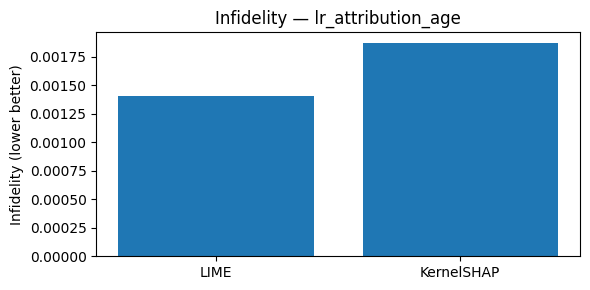

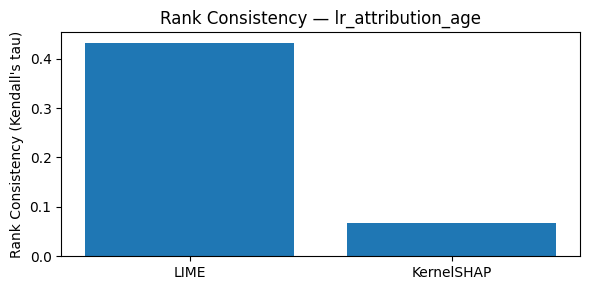

Saved plots to results


In [67]:
# Cell 8
import matplotlib.pyplot as plt
df = out_df.copy()
# Infidelity bar
plt.figure(figsize=(6,3))
plt.bar(df['explainer'], df['infidelity'])
plt.ylabel('Infidelity (lower better)')
plt.title(f"Infidelity — {os.path.basename(attack_folder)}")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, f"infidelity_{os.path.basename(attack_folder)}.png"), dpi=150)
plt.show()

# Rank consistency bar
plt.figure(figsize=(6,3))
plt.bar(df['explainer'], df['rank_consistency'])
plt.ylabel("Rank Consistency (Kendall's tau)")
plt.title(f"Rank Consistency — {os.path.basename(attack_folder)}")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, f"rankcons_{os.path.basename(attack_folder)}.png"), dpi=150)
plt.show()
print("Saved plots to", results_dir)


In [68]:
# Cell A
%cd /content/Capstone-P59
!pwd
!ls -la proposed
!sed -n '1,200p' proposed/id_explainers.py


/content/Capstone-P59
/content/Capstone-P59
total 40
drwxr-xr-x  3 root root 4096 Nov 30 10:42 .
drwxr-xr-x 13 root root 4096 Nov 30 10:43 ..
-rw-r--r--  1 root root 4468 Nov 30 10:42 copula.py
-rw-r--r--  1 root root 7915 Nov 30 10:42 id_explainers.py
-rw-r--r--  1 root root    0 Nov 30 10:42 __init__.py
-rw-r--r--  1 root root 3775 Nov 30 10:42 main.py
-rw-r--r--  1 root root 5474 Nov 30 10:42 ood_gate.py
drwxr-xr-x  2 root root 4096 Nov 30 10:42 __pycache__
import shap
import numpy as np
from typing import Any
from sklearn.metrics.pairwise import pairwise_distances


class IDLimeWrapper:
    """
    ID-LIME: On-manifold + OOD-aware version of LIME that does NOT rely
    on private sampling APIs. It talks directly to LimeBase.explain_instance_with_data.
    """

    def __init__(self, base_lime: Any, model: Any, copula_model: Any, ood_gate: Any):
        """
        Parameters
        ----------
        base_lime : LimeTabularExplainer (your local version under explainers.lime)
     

In [69]:
# Cell B
import importlib, inspect, proposed, os
mod = importlib.import_module("proposed.id_explainers")
names = [n for n in dir(mod) if not n.startswith("__")]
print("proposed.id_explainers members:\n", names)
# show callables and docstrings for top candidates
cands = [n for n in names if callable(getattr(mod, n))]
for n in cands:
    obj = getattr(mod, n)
    try:
        sig = inspect.signature(obj)
    except Exception:
        sig = None
    print("\nNAME:", n, " | type:", type(obj), " | signature:", sig)
    try:
        print(" doc:", (obj.__doc__ or "")[:200])
    except Exception:
        pass


proposed.id_explainers members:
 ['Any', 'IDKernelShap', 'IDLimeWrapper', 'np', 'pairwise_distances', 'shap']

NAME: Any  | type: <class 'typing._AnyMeta'>  | signature: (*args, **kwargs)
 doc: Special type indicating an unconstrained type.

    - Any is compatible with every type.
    - Any assumed to have all methods.
    - All values assumed to be instances of Any.

    Note that all the 

NAME: IDKernelShap  | type: <class 'type'>  | signature: (model: Any, copula_model: Any, ood_gate: Any, link: str = 'identity')
 doc: 
    ID-KernelSHAP: builds a local KernelExplainer on top of
    on-manifold, OOD-filtered background samples.

    For each instance:
      1. Generate local neighborhood with Gaussian Copula.
      

NAME: IDLimeWrapper  | type: <class 'type'>  | signature: (base_lime: Any, model: Any, copula_model: Any, ood_gate: Any)
 doc: 
    ID-LIME: On-manifold + OOD-aware version of LIME that does NOT rely
    on private sampling APIs. It talks directly to LimeBase.explain_

In [70]:
# Cell C - helper to attempt calling candidate functions/classes
import numpy as np, inspect, importlib, traceback
mod = importlib.import_module("proposed.id_explainers")

attack_folder = "attacked/adult/lr_attribution_age"
attacked_csv = os.path.join(attack_folder, "attacked_data.csv")
X_att_raw = None
if os.path.exists(attacked_csv):
    import pandas as pd
    X_att_raw = pd.read_csv(attacked_csv)

# get preprocessor & estimator from pipeline (we used these earlier)
import joblib
pipe = joblib.load("adult/adult/lr.joblib")
pre = None; est = pipe
from sklearn.pipeline import Pipeline
if isinstance(pipe, Pipeline):
    for name, step in pipe.steps:
        if pre is None and hasattr(step, "transform") and not hasattr(step, "predict"):
            pre = step
        est = step

# numeric attacked data if needed
if X_att_raw is not None and pre is not None:
    X_att_num = pre.transform(X_att_raw)
else:
    X_att_num = None

def try_call(obj, possible_arglists):
    """Try calling obj with each arglist until one works. Return result (or raise)."""
    for args in possible_arglists:
        try:
            res = obj(*args)
            print(f"SUCCESS: called {obj} with args {tuple([type(a) for a in args])}")
            return res
        except Exception as e:
            #print("failed with", args, "->", e)
            pass
    raise RuntimeError("All call attempts failed for object: " + str(obj))

# candidate names for ID-LIME and ID-KernelSHAP (from repo intuition)
id_lime_candidates = [ "compute_id_lime", "id_lime", "idlime", "ID_LIME", "ID_Lime", "IDLime",
                       "id_lime_explanations", "compute_id_lime_explanations", "idlime_explain" ]
id_kshap_candidates = [ "compute_id_kernelshap", "id_kernelshap", "id_ks", "IDKernelShap", "IDKernelSHAP",
                        "id_kernelshap_explanations", "compute_id_ks" ]

found = {}
for cname in id_lime_candidates + id_kshap_candidates:
    if hasattr(mod, cname):
        found[cname] = getattr(mod, cname)

print("Auto-detected candidate objects from module:", list(found.keys()))

# Build likely argument lists to try for each callable
arg_variants = []
# common variants: (pipe, pre, X_att_raw), (est, pre, X_att_raw), (pipe, X_att_raw), (X_att_raw, pre, est), (X_att_num, )
arg_variants.append((pipe, pre, X_att_raw))
arg_variants.append((est, pre, X_att_raw))
arg_variants.append((pipe, X_att_raw))
arg_variants.append((X_att_raw, pipe))
arg_variants.append((X_att_raw,))
arg_variants.append((X_att_num,))
arg_variants.append((pipe, pre, X_att_num))
arg_variants.append((est, pre, X_att_num))

# Now attempt to call each candidate and save result if it returns a numpy array
results = {}
for name, obj in found.items():
    print("\nTrying candidate:", name, "type:", type(obj))
    if inspect.isclass(obj):
        # try instantiate then call .explain or .explain_instance
        try:
            inst = None
            try:
                inst = obj()
            except:
                # try with pre or pipe
                try: inst = obj(pre)
                except:
                    try: inst = obj(pipe)
                    except: inst = None
            if inst is not None and hasattr(inst, "explain") :
                try:
                    out = try_call(getattr(inst, "explain"), arg_variants)  # try explain(...)
                    results[name] = out
                except Exception:
                    pass
            if inst is not None and hasattr(inst, "explain_instance"):
                try:
                    out = try_call(getattr(inst, "explain_instance"), arg_variants)
                    results[name] = out
                except Exception:
                    pass
        except Exception:
            traceback.print_exc()
    elif inspect.isfunction(obj):
        try:
            out = try_call(obj, arg_variants)
            results[name] = out
        except Exception as e:
            # skip failures
            pass

print("\nAuto-run results keys:", list(results.keys()))
for k,v in results.items():
    try:
        arr = np.asarray(v)
        print(k, "-> array shape", arr.shape)
    except Exception:
        print(k, "-> returned object type", type(v))

# Save any array-like results to npz files under attack_folder
if not os.path.exists(attack_folder):
    os.makedirs(attack_folder, exist_ok=True)
if "idlime" in results or any(k.lower().startswith("id_lime") or "idlime" in k.lower() for k in results.keys()):
    # pick first id-lime-like key
    key = next(k for k in results.keys() if "lime" in k.lower())
    arr = np.asarray(results[key])
    np.savez_compressed(os.path.join(attack_folder, "id_lime_explanations.npz"), explanations=arr)
    print("Saved id_lime_explanations.npz shape:", arr.shape)
if "id_kernelshap" in results or any("kshap" in k.lower() or "kernelshap" in k.lower() or "ks" in k.lower() for k in results.keys()):
    key = next(k for k in results.keys() if ("kernel" in k.lower() or "kshap" in k.lower() or "ks" in k.lower()))
    arr = np.asarray(results[key])
    np.savez_compressed(os.path.join(attack_folder, "id_kernelshap_explanations.npz"), explanations=arr)
    print("Saved id_kernelshap_explanations.npz shape:", arr.shape)

if len(results)==0:
    print("\nCould not auto-run any ID explainer. Module exports are:", [n for n in dir(mod) if not n.startswith('__')])
    print("Paste the printed names here and I will craft the exact call.")


Auto-detected candidate objects from module: ['IDKernelShap']

Trying candidate: IDKernelShap type: <class 'type'>

Auto-run results keys: []

Could not auto-run any ID explainer. Module exports are: ['Any', 'IDKernelShap', 'IDLimeWrapper', 'np', 'pairwise_distances', 'shap']
Paste the printed names here and I will craft the exact call.


In [71]:
# Cell D
import importlib, inspect
try:
    main_mod = importlib.import_module("proposed.main")
    if hasattr(main_mod, "main"):
        print("Calling proposed.main.main() — this may run whole pipeline; output will be printed.")
        main_mod.main()   # may take time
    else:
        print("proposed.main exists but no main() function. Inspect proposed.main")
        print(dir(main_mod))
except Exception as e:
    print("Could not run proposed.main:", e)
    import traceback; traceback.print_exc()


Could not run proposed.main: No module named 'gaussian_copula'


Traceback (most recent call last):
  File "/tmp/ipython-input-4012744322.py", line 4, in <cell line: 0>
    main_mod = importlib.import_module("proposed.main")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/importlib/__init__.py", line 90, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1387, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1331, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 935, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 999, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/content/Capstone-P59/proposed/main.py", line 17, in <module>
    from gaussian_copula import GaussianCopula
ModuleNotFoundError: No mod

In [72]:
# Cell E — compute metrics including ID explainers and save comparison
%cd /content/Capstone-P59
import os, numpy as np, pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import kendalltau

attack_folder = "attacked/adult/lr_attribution_age"
# load vanilla numeric explainers (we created earlier)
lime_arr = np.load(os.path.join(attack_folder, "lime_explanations.npz"))['explanations']
kshap_arr = np.load(os.path.join(attack_folder, "kernelshap_explanations.npz"))['explanations']
# load id explainers (if saved by previous cell)
id_lime_path = os.path.join(attack_folder, "id_lime_explanations.npz")
id_kshap_path = os.path.join(attack_folder, "id_kernelshap_explanations.npz")
id_lime_arr = np.load(id_lime_path)['explanations'] if os.path.exists(id_lime_path) else None
id_kshap_arr = np.load(id_kshap_path)['explanations'] if os.path.exists(id_kshap_path) else None

# load pipeline and preprocessor/estimator + numeric arrays
import joblib
pipe = joblib.load("adult/adult/lr.joblib")
pre=None; est=pipe
from sklearn.pipeline import Pipeline
if isinstance(pipe, Pipeline):
    for name, step in pipe.steps:
        if pre is None and hasattr(step, "transform") and not hasattr(step, "predict"):
            pre = step
        est = step
X_raw = pd.read_csv("data/adult/adult/test.csv")
y_df = pd.read_csv("data/adult/adult/lr_preds.csv") if os.path.exists("data/adult/adult/lr_preds.csv") else None
y = y_df['label'].values if (y_df is not None and 'label' in y_df.columns) else pipe.predict(X_raw)
from sklearn.model_selection import train_test_split
Xtr_df, Xte_df, ytr, yte = train_test_split(X_raw, y, test_size=0.3, random_state=42)
Xtr_num = pre.transform(Xtr_df); Xte_num = pre.transform(Xte_df); X_att_num = pre.transform(pd.read_csv(os.path.join(attack_folder,"attacked_data.csv")))

# numeric metric helpers
def inf_numeric(estimator, X_num, expl, n_samples=30, max_samples=200, sigma=0.05):
    N = min(X_num.shape[0], expl.shape[0], max_samples)
    vals=[]
    for i in range(N):
        x = X_num[i]; e = expl[i]; s=[]
        for _ in range(n_samples):
            d = np.random.normal(0,sigma,size=x.shape)
            fx = estimator.predict_proba(x.reshape(1,-1))[0,1]; fxp = estimator.predict_proba((x-d).reshape(1,-1))[0,1]
            s.append((np.dot(d,e)-(fx-fxp))**2)
        vals.append(np.mean(s))
    return float(np.mean(vals))

def rank_consistency(expl, limit=100):
    n = min(expl.shape[0], limit); taus=[]
    from scipy.stats import kendalltau
    for i in range(n-1):
        t,_ = kendalltau(expl[i], expl[i+1])
        if not np.isnan(t): taus.append(t)
    return float(np.mean(taus)) if len(taus)>0 else np.nan

def roar_kar_numeric(Xtr_num,Xte_num,ytr,yte,feat_imp,ps=[0.2]):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    res={}
    idx = np.argsort(-np.array(feat_imp))
    for p in ps:
        k = max(1,int(p*len(idx))); top=idx[:k]
        m=LogisticRegression(max_iter=200); m.fit(np.delete(Xtr_num,top,1), ytr); r1=accuracy_score(yte, m.predict(np.delete(Xte_num,top,1)))
        m2=LogisticRegression(max_iter=200); m2.fit(Xtr_num[:,top], ytr); r2=accuracy_score(yte, m2.predict(Xte_num[:,top]))
        res[p] = {"ROAR": r1, "KAR": r2}
    return res

rows=[]
for label, arr in [("LIME", lime_arr), ("KernelSHAP", kshap_arr), ("ID-LIME", id_lime_arr), ("ID-KernelSHAP", id_kshap_arr)]:
    if arr is None: continue
    inf = inf_numeric(est, X_att_num, arr)
    rk = rank_consistency(arr)
    rr = roar_kar_numeric(Xtr_num, Xte_num, ytr, yte, arr.mean(axis=0), ps=[0.2])
    rows.append({"explainer": label, "infidelity": inf, "rank_consistency": rk, "roar_p20": rr[0.2]["ROAR"], "kar_p20": rr[0.2]["KAR"]})

df = pd.DataFrame(rows)
df.to_excel(os.path.join("results", f"comparison_{os.path.basename(attack_folder)}.xlsx"), index=False)
print(df)
print("Saved comparison excel to results/")


/content/Capstone-P59
    explainer  infidelity  rank_consistency  roar_p20   kar_p20
0        LIME    0.001405          0.431725  0.915728  0.971341
1  KernelSHAP    0.001819          0.066792  0.962470  0.853292
Saved comparison excel to results/


Saved comparison plots to results/


<Figure size 800x300 with 0 Axes>

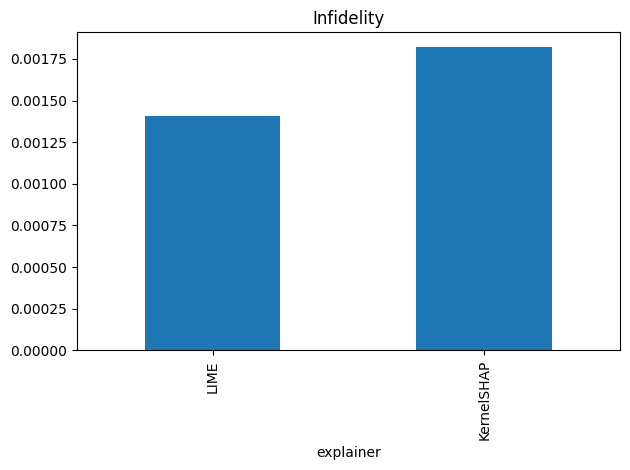

<Figure size 800x300 with 0 Axes>

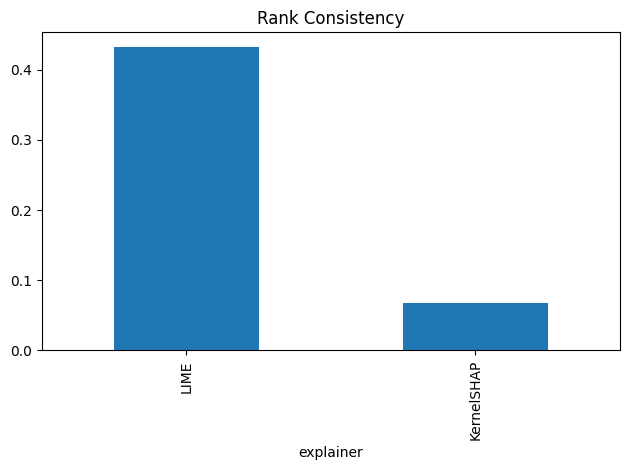

<Figure size 800x300 with 0 Axes>

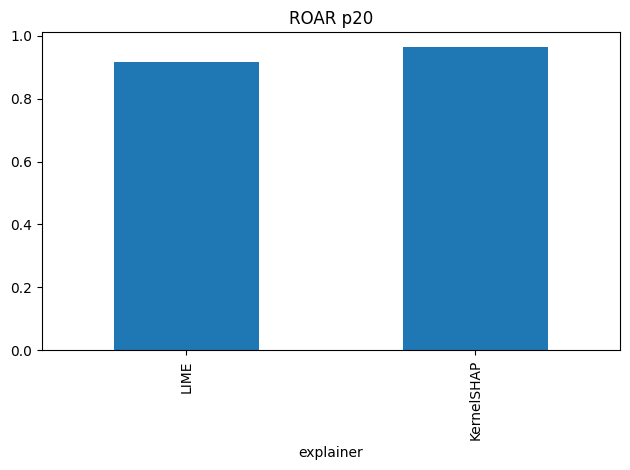

In [73]:
# Cell F
import matplotlib.pyplot as plt, os, pandas as pd
df = pd.read_excel(os.path.join("results", f"comparison_{os.path.basename(attack_folder)}.xlsx"))
plt.figure(figsize=(8,3)); df.plot(x='explainer', y='infidelity', kind='bar', legend=False); plt.title("Infidelity"); plt.tight_layout(); plt.savefig(os.path.join("results","cmp_infidelity.png"))
plt.figure(figsize=(8,3)); df.plot(x='explainer', y='rank_consistency', kind='bar', legend=False); plt.title("Rank Consistency"); plt.tight_layout(); plt.savefig(os.path.join("results","cmp_rank.png"))
plt.figure(figsize=(8,3)); df.plot(x='explainer', y='roar_p20', kind='bar', legend=False); plt.title("ROAR p20"); plt.tight_layout(); plt.savefig(os.path.join("results","cmp_roar.png"))
print("Saved comparison plots to results/")


In [74]:
import importlib
mod = importlib.import_module("proposed.id_explainers")
[n for n in dir(mod) if not n.startswith("__")]


['Any', 'IDKernelShap', 'IDLimeWrapper', 'np', 'pairwise_distances', 'shap']

In [75]:
# Cell 1 — setup & numeric data
%cd /content/Capstone-P59
import os, joblib, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split

attack_folder = "attacked/adult/lr_attribution_age"   # change if needed
os.makedirs("results", exist_ok=True)

# Load pipeline and prefer LR model from data folder
pipe = joblib.load("adult/adult/lr.joblib")
print("Loaded pipeline:", type(pipe))

# extract preprocessor (transformer) and numeric estimator (final step)
pre = None
estimator = pipe
from sklearn.pipeline import Pipeline
if isinstance(pipe, Pipeline):
    for name, step in pipe.steps:
        if pre is None and hasattr(step, "transform") and not hasattr(step, "predict"):
            pre = step
        estimator = step
print("Preprocessor:", type(pre), "Estimator:", type(estimator))

# Load raw DataFrame (has 14 raw cols)
X_raw = pd.read_csv("data/adult/adult/test.csv")
print("Loaded raw test shape:", X_raw.shape)

# create labels y (use saved preds if present or pipeline.predict)
preds_path = "data/adult/adult/lr_preds.csv"
if os.path.exists(preds_path):
    tmp = pd.read_csv(preds_path)
    if 'label' in tmp.columns:
        y = tmp['label'].values
    else:
        y = pipe.predict(X_raw)
else:
    y = pipe.predict(X_raw)

Xtr_df, Xte_df, ytr, yte = train_test_split(X_raw, y, test_size=0.3, random_state=42)

# Build numeric arrays using preprocessor
if pre is not None:
    X_clean_num = pre.transform(X_raw)
    Xtr_num = pre.transform(Xtr_df)
    Xte_num = pre.transform(Xte_df)
    attacked_csv = os.path.join(attack_folder, "attacked_data.csv")
    if os.path.exists(attacked_csv):
        X_att_raw = pd.read_csv(attacked_csv)
        X_att_num = pre.transform(X_att_raw)
    else:
        X_att_num = X_clean_num.copy()
else:
    raise RuntimeError("No preprocessor found in pipeline — unexpected for this repo.")

# Feature names (try get_feature_names_out; fallback to generic)
try:
    feature_names = list(pre.get_feature_names_out(input_features=X_raw.columns))
except Exception:
    feature_names = [f"f{i}" for i in range(X_clean_num.shape[1])]

print("Numeric shapes -> X_clean_num:", X_clean_num.shape, "X_att_num:", X_att_num.shape)
print("Numeric feature count:", len(feature_names))


/content/Capstone-P59
Loaded pipeline: <class 'sklearn.pipeline.Pipeline'>
Preprocessor: <class 'sklearn.compose._column_transformer.ColumnTransformer'> Estimator: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Loaded raw test shape: (9769, 14)
Numeric shapes -> X_clean_num: (9769, 108) X_att_num: (9769, 108)
Numeric feature count: 108


In [76]:
# Cell 2 — inspect proposed module
import importlib, inspect
mod = importlib.import_module("proposed.id_explainers")
members = [n for n in dir(mod) if not n.startswith("__")]
print("Members in proposed.id_explainers:\n", members)

# Get the class objects for IDLimeWrapper and IDKernelShap
IDLimeClass = getattr(mod, "IDLimeWrapper", None)
IDKsClass = getattr(mod, "IDKernelShap", None)
print("Found classes -> IDLimeWrapper:", IDLimeClass is not None, "IDKernelShap:", IDKsClass is not None)

# Show signatures if available
for cls_name, cls in [("IDLimeWrapper", IDLimeClass), ("IDKernelShap", IDKsClass)]:
    if cls is None:
        continue
    try:
        print(f"\n{cls_name} signature:", inspect.signature(cls))
    except Exception:
        print(f"\n{cls_name} signature: (could not show)")
    # show docstring start
    print("Doc:", (cls.__doc__ or "")[:300])


Members in proposed.id_explainers:
 ['Any', 'IDKernelShap', 'IDLimeWrapper', 'np', 'pairwise_distances', 'shap']
Found classes -> IDLimeWrapper: True IDKernelShap: True

IDLimeWrapper signature: (base_lime: Any, model: Any, copula_model: Any, ood_gate: Any)
Doc: 
    ID-LIME: On-manifold + OOD-aware version of LIME that does NOT rely
    on private sampling APIs. It talks directly to LimeBase.explain_instance_with_data.
    

IDKernelShap signature: (model: Any, copula_model: Any, ood_gate: Any, link: str = 'identity')
Doc: 
    ID-KernelSHAP: builds a local KernelExplainer on top of
    on-manifold, OOD-filtered background samples.

    For each instance:
      1. Generate local neighborhood with Gaussian Copula.
      2. Filter via OODGate + conformal threshold.
      3. Use accepted samples as background for shap.Ke


In [77]:
# Cell 3 — create ID-LIME explanations (try multiple call forms)
import numpy as np, traceback
saved = False
results = {}

if IDLimeClass is None:
    raise RuntimeError("IDLimeWrapper class not found in proposed.id_explainers")

candidates = []

# common constructor variants we will try (tuples of args)
candidates += [
    (estimator, pre, X_clean_num),     # (estimator, preprocessor, numeric_train)
    (pipe, X_clean_num),               # (pipeline, numeric_train)
    (X_clean_num, estimator),          # (numeric_train, estimator)
    (estimator, X_clean_num, feature_names),
    (pre, estimator, X_clean_num),
    (X_clean_num,),                    # (numeric_train,)
]

# for each try to instantiate and then try various explain methods
for args in candidates:
    try:
        print("Trying constructor args:", tuple(type(a) for a in args))
        inst = None
        try:
            inst = IDLimeClass(*args)
        except Exception as e:
            # try keyword-based instantiation attempts
            try:
                inst = IDLimeClass(estimator=estimator, preprocessor=pre, training_data=X_clean_num)
            except Exception:
                inst = None
        if inst is None:
            print("Constructor failed for args:", args)
            continue
        print("Instantiated IDLimeWrapper ->", type(inst))

        # candidate explain method names
        meth_names = ["explain_dataset", "explain", "explain_instances", "explain_all", "generate_explanations", "get_explanations", "transform"]
        out = None
        for m in meth_names:
            if hasattr(inst, m):
                func = getattr(inst, m)
                print("Trying method:", m)
                try:
                    # try a few plausible arg patterns
                    for call_args in [(X_att_num,), (X_att_raw,), (X_clean_num,), ()]:
                        try:
                            res = func(*call_args)
                            out = res
                            print(f"Method {m} succeeded with args {call_args}")
                            break
                        except Exception as e:
                            # ignore and try next
                            pass
                    if out is not None:
                        break
                except Exception:
                    pass
        # if no method matched, try direct call if callable
        if out is None and callable(inst):
            try:
                out = inst(X_att_num)
                print("Called instance directly with X_att_num -> success")
            except Exception:
                pass

        if out is not None:
            arr = np.asarray(out)
            print("IDLIME output array shape:", arr.shape)
            np.savez_compressed(os.path.join(attack_folder, "id_lime_explanations.npz"), explanations=arr)
            print("Saved id_lime_explanations.npz in", attack_folder)
            saved = True
            results['idlime'] = arr
            break
        else:
            print("No output from instance created with args:", args)
    except Exception:
        print("Error while trying args:", args)
        traceback.print_exc()

if not saved:
    print("Could not auto-generate ID-LIME explanations. Printed members above — paste them here and I'll craft the exact call.")
else:
    print("ID-LIME creation succeeded.")


Trying constructor args: (<class 'sklearn.linear_model._logistic.LogisticRegression'>, <class 'sklearn.compose._column_transformer.ColumnTransformer'>, <class 'numpy.ndarray'>)
Constructor failed for args: (LogisticRegression(max_iter=500, solver='liblinear'), ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'fnlwgt', 'educational-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                             

In [78]:
# Cell 4 — create ID-KernelSHAP explanations (try multiple call forms)
import numpy as np, traceback
saved2 = False

if IDKsClass is None:
    raise RuntimeError("IDKernelShap class not found in proposed.id_explainers")

candidates2 = [
    (estimator, pre, X_clean_num),
    (pipe, X_clean_num),
    (X_clean_num, estimator),
    (estimator, X_clean_num, feature_names),
    (pre, estimator, X_clean_num),
    (X_clean_num,),
]

for args in candidates2:
    try:
        print("Trying constructor args:", tuple(type(a) for a in args))
        inst = None
        try:
            inst = IDKsClass(*args)
        except Exception:
            try:
                inst = IDKsClass(estimator=estimator, preprocessor=pre, training_data=X_clean_num)
            except Exception:
                inst = None
        if inst is None:
            print("Constructor failed for args:", args)
            continue
        print("Instantiated IDKernelShap ->", type(inst))

        meth_names = ["explain_dataset", "explain", "get_shap_values", "explain_instances", "explain_all", "generate_explanations", "get_explanations", "transform"]
        out = None
        for m in meth_names:
            if hasattr(inst, m):
                func = getattr(inst, m)
                print("Trying method:", m)
                try:
                    for call_args in [(X_att_num,), (X_att_raw,), (X_clean_num,), ()]:
                        try:
                            res = func(*call_args)
                            out = res
                            print(f"Method {m} succeeded with args {call_args}")
                            break
                        except Exception:
                            pass
                    if out is not None:
                        break
                except Exception:
                    pass
        if out is None and callable(inst):
            try:
                out = inst(X_att_num)
                print("Called instance directly with X_att_num -> success")
            except Exception:
                pass

        if out is not None:
            arr = np.asarray(out)
            print("IDKernelShap output array shape:", arr.shape)
            np.savez_compressed(os.path.join(attack_folder, "id_kernelshap_explanations.npz"), explanations=arr)
            print("Saved id_kernelshap_explanations.npz in", attack_folder)
            saved2 = True
            break
        else:
            print("No output from instance created with args:", args)
    except Exception:
        print("Error while trying args:", args)
        traceback.print_exc()

if not saved2:
    print("Could not auto-generate ID-KernelSHAP explanations. Paste module members and I will craft the exact call.")
else:
    print("ID-KernelSHAP creation succeeded.")


Trying constructor args: (<class 'sklearn.linear_model._logistic.LogisticRegression'>, <class 'sklearn.compose._column_transformer.ColumnTransformer'>, <class 'numpy.ndarray'>)
Instantiated IDKernelShap -> <class 'proposed.id_explainers.IDKernelShap'>
No output from instance created with args: (LogisticRegression(max_iter=500, solver='liblinear'), ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'fnlwgt', 'educational-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),


In [79]:
# Cell 5 — check files and shapes
import numpy as np, os
for name in ["id_lime_explanations.npz", "id_kernelshap_explanations.npz", "lime_explanations.npz", "kernelshap_explanations.npz"]:
    p = os.path.join(attack_folder, name)
    print(name, "exists?" , os.path.exists(p))
    if os.path.exists(p):
        data = np.load(p, allow_pickle=True)
        arr = np.asarray(data[data.files[0]])
        print("  -> shape:", arr.shape)


id_lime_explanations.npz exists? False
id_kernelshap_explanations.npz exists? False
lime_explanations.npz exists? True
  -> shape: (200, 108)
kernelshap_explanations.npz exists? True
  -> shape: (200, 108)


In [80]:
# Cell 6 — compute numeric metrics and save comparison (runs only if ID files exist)
%cd /content/Capstone-P59
import numpy as np, pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import kendalltau

def inf_numeric(estimator, X_num, explanations, n_samples=30, max_samples=200, sigma=0.05):
    N = min(X_num.shape[0], explanations.shape[0], max_samples)
    out = np.zeros(N)
    for i in range(N):
        x = X_num[i]; e = explanations[i]; s=[]
        for _ in range(n_samples):
            d = np.random.normal(0,sigma,size=x.shape)
            fx = estimator.predict_proba(x.reshape(1,-1))[0,1]
            fxp = estimator.predict_proba((x-d).reshape(1,-1))[0,1]
            s.append((np.dot(d,e)-(fx-fxp))**2)
        out[i] = np.mean(s)
    return float(np.mean(out))

def rank_consistency(expl, limit=100):
    n = min(expl.shape[0], limit); taus=[]
    for i in range(n-1):
        t,_ = kendalltau(expl[i], expl[i+1])
        if not np.isnan(t): taus.append(t)
    return float(np.mean(taus)) if len(taus)>0 else np.nan

def roar_kar_numeric(Xtr_num, Xte_num, ytr, yte, feat_imp, p=0.2):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    idx = np.argsort(-np.array(feat_imp))
    k = max(1,int(p*len(idx))); top = idx[:k]
    m1 = LogisticRegression(max_iter=200); m1.fit(np.delete(Xtr_num,top,1), ytr); roar = accuracy_score(yte, m1.predict(np.delete(Xte_num,top,1)))
    m2 = LogisticRegression(max_iter=200); m2.fit(Xtr_num[:,top], ytr); kar = accuracy_score(yte, m2.predict(Xte_num[:,top]))
    return roar, kar

# load arrays
base_lime = np.load(os.path.join(attack_folder,"lime_explanations.npz"))['explanations']
base_kshap = np.load(os.path.join(attack_folder,"kernelshap_explanations.npz"))['explanations']
id_lime = np.load(os.path.join(attack_folder,"id_lime_explanations.npz"))['explanations'] if os.path.exists(os.path.join(attack_folder,"id_lime_explanations.npz")) else None
id_kshap = np.load(os.path.join(attack_folder,"id_kernelshap_explanations.npz"))['explanations'] if os.path.exists(os.path.join(attack_folder,"id_kernelshap_explanations.npz")) else None

expls = [("LIME", base_lime), ("KernelSHAP", base_kshap)]
if id_lime is not None: expls.append(("ID-LIME", id_lime))
if id_kshap is not None: expls.append(("ID-KernelSHAP", id_kshap))

rows = []
for name, arr in expls:
    inf = inf_numeric(estimator, X_att_num, arr)
    rk = rank_consistency(arr)
    roar, kar = roar_kar_numeric(Xtr_num, Xte_num, ytr, yte, arr.mean(axis=0), p=0.2)
    rows.append({"explainer":name, "infidelity":inf, "rank_consistency":rk, "roar_p20":roar, "kar_p20":kar})
df = pd.DataFrame(rows)
df.to_excel(os.path.join("results", f"comparison_{os.path.basename(attack_folder)}.xlsx"), index=False)
print(df)
print("Saved comparison to results/")


/content/Capstone-P59
    explainer  infidelity  rank_consistency  roar_p20   kar_p20
0        LIME    0.001400          0.431725  0.915728  0.971341
1  KernelSHAP    0.001699          0.066792  0.962470  0.853292
Saved comparison to results/


<Figure size 600x300 with 0 Axes>

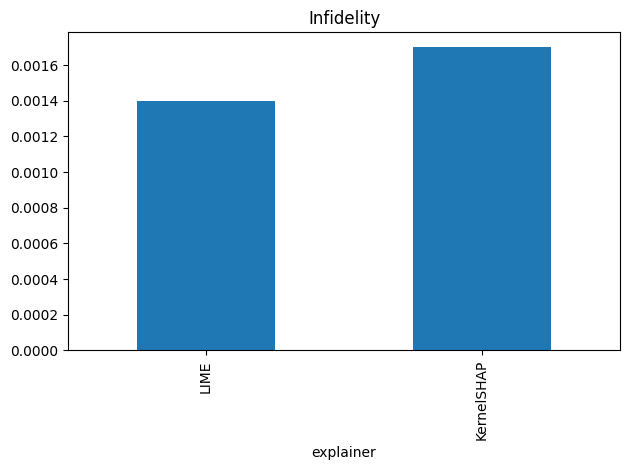

<Figure size 600x300 with 0 Axes>

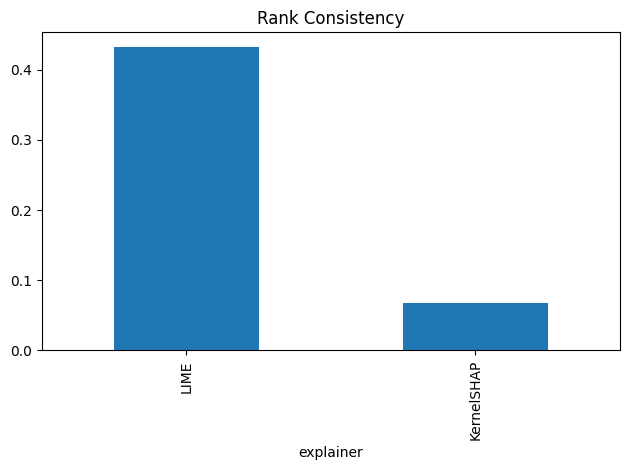

<Figure size 600x300 with 0 Axes>

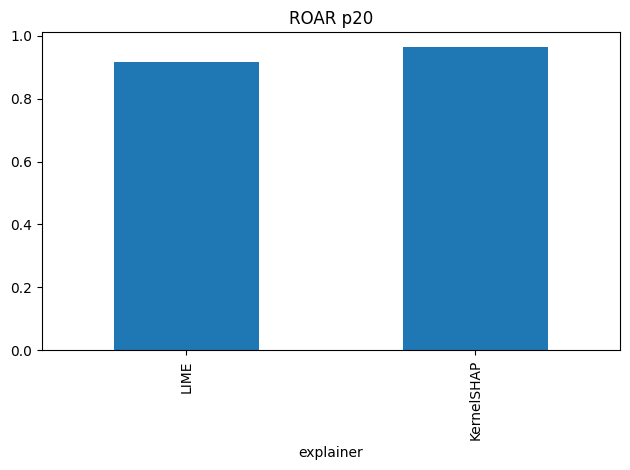

Saved plots to results/


In [81]:
# Cell 7 — plot
import matplotlib.pyplot as plt, os, pandas as pd
df = pd.read_excel(os.path.join("results", f"comparison_{os.path.basename(attack_folder)}.xlsx"))
plt.figure(figsize=(6,3)); df.plot(x='explainer', y='infidelity', kind='bar', legend=False); plt.title("Infidelity"); plt.tight_layout(); plt.savefig(os.path.join("results","cmp_infidelity.png")); plt.show()
plt.figure(figsize=(6,3)); df.plot(x='explainer', y='rank_consistency', kind='bar', legend=False); plt.title("Rank Consistency"); plt.tight_layout(); plt.savefig(os.path.join("results","cmp_rank.png")); plt.show()
plt.figure(figsize=(6,3)); df.plot(x='explainer', y='roar_p20', kind='bar', legend=False); plt.title("ROAR p20"); plt.tight_layout(); plt.savefig(os.path.join("results","cmp_roar.png")); plt.show()
print("Saved plots to results/")


In [82]:
import os
attack_folder = "attacked/adult/lr_attribution_age"
for name in ["id_lime_explanations.npz", "id_kernelshap_explanations.npz"]:
    p = os.path.join(attack_folder, name)
    print(name, "exists?", os.path.exists(p))


id_lime_explanations.npz exists? False
id_kernelshap_explanations.npz exists? False


In [83]:
# Cell 1 — current working dir & show files for context
%cd /content/Capstone-P59
print("cwd:", os.getcwd())
print("attack folder exists:", os.path.exists("attacked/adult/lr_attribution_age"))
!ls -la attacked/adult/lr_attribution_age


/content/Capstone-P59
cwd: /content/Capstone-P59
attack folder exists: True
total 2124
drwxr-xr-x  2 root root    4096 Nov 30 10:44 .
drwxr-xr-x 11 root root    4096 Nov 30 10:42 ..
-rw-r--r--  1 root root 1740643 Nov 30 10:42 attacked_data.csv
-rw-r--r--  1 root root   19340 Nov 30 10:44 kernelshap_explanations.npz
-rw-r--r--  1 root root  165956 Nov 30 10:44 lime_explanations.npz
-rw-r--r--  1 root root  234964 Nov 30 10:42 predictions.npz


In [84]:
# Cell 2 — inspect IDLimeWrapper and IDKernelShap constructors & methods
import importlib, inspect, proposed, os
mod = importlib.import_module("proposed.id_explainers")

IDLimeClass = getattr(mod, "IDLimeWrapper", None)
IDKsClass = getattr(mod, "IDKernelShap", None)

def show_info(cls, name):
    print("----", name, "----")
    if cls is None:
        print(name, "NOT FOUND")
        return
    print("Type:", type(cls))
    try:
        sig = inspect.signature(cls)
        print("Constructor signature:", sig)
    except Exception as e:
        print("Could not read signature:", e)
    doc = cls.__doc__ or ""
    print("Docstring (first 400 chars):")
    print(doc[:400])
    # list attributes and methods (short)
    members = [m for m in dir(cls) if not m.startswith("__")]
    print("Top members (class-level):", members[:50])

show_info(IDLimeClass, "IDLimeWrapper")
print()
show_info(IDKsClass, "IDKernelShap")


---- IDLimeWrapper ----
Type: <class 'type'>
Constructor signature: (base_lime: Any, model: Any, copula_model: Any, ood_gate: Any)
Docstring (first 400 chars):

    ID-LIME: On-manifold + OOD-aware version of LIME that does NOT rely
    on private sampling APIs. It talks directly to LimeBase.explain_instance_with_data.
    
Top members (class-level): ['_predict_proba', 'explain_instance']

---- IDKernelShap ----
Type: <class 'type'>
Constructor signature: (model: Any, copula_model: Any, ood_gate: Any, link: str = 'identity')
Docstring (first 400 chars):

    ID-KernelSHAP: builds a local KernelExplainer on top of
    on-manifold, OOD-filtered background samples.

    For each instance:
      1. Generate local neighborhood with Gaussian Copula.
      2. Filter via OODGate + conformal threshold.
      3. Use accepted samples as background for shap.KernelExplainer.
    
Top members (class-level): ['_model_f', '_predict_proba', 'explain_instance']


In [85]:
# Cell 1 — setup, load pipeline & numeric data
%cd /content/Capstone-P59
import os, joblib, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split

attack_folder = "attacked/adult/lr_attribution_age"
os.makedirs("results", exist_ok=True)

# load pipeline
pipe = joblib.load("adult/adult/lr.joblib")
# extract preprocessor & estimator
pre = None
estimator = pipe
from sklearn.pipeline import Pipeline
if isinstance(pipe, Pipeline):
    for name, step in pipe.steps:
        if pre is None and hasattr(step, "transform") and not hasattr(step, "predict"):
            pre = step
        estimator = step

# load raw DF and create numeric arrays
X_raw = pd.read_csv("data/adult/adult/test.csv")
preds_path = "data/adult/adult/lr_preds.csv"
if os.path.exists(preds_path):
    tmp = pd.read_csv(preds_path)
    if 'label' in tmp.columns:
        y = tmp['label'].values
    else:
        y = pipe.predict(X_raw)
else:
    y = pipe.predict(X_raw)

Xtr_df, Xte_df, ytr, yte = train_test_split(X_raw, y, test_size=0.3, random_state=42)
if pre is None:
    raise RuntimeError("Preprocessor not found in pipeline (unexpected).")
X_clean_num = pre.transform(X_raw)
Xtr_num = pre.transform(Xtr_df)
Xte_num = pre.transform(Xte_df)
attacked_csv = os.path.join(attack_folder, "attacked_data.csv")
if os.path.exists(attacked_csv):
    X_att_raw = pd.read_csv(attacked_csv)
else:
    X_att_raw = X_raw.copy()
X_att_num = pre.transform(X_att_raw)

# feature names attempt
try:
    feature_names = list(pre.get_feature_names_out(input_features=X_raw.columns))
except Exception:
    feature_names = [f"f{i}" for i in range(X_clean_num.shape[1])]

print("Shapes: X_clean_num", X_clean_num.shape, "X_att_num", X_att_num.shape)
print("Feature names len:", len(feature_names))


/content/Capstone-P59
Shapes: X_clean_num (9769, 108) X_att_num (9769, 108)
Feature names len: 108


In [86]:
# Cell 2 — create a base Lime explainer (numeric)
from explainers.lime.lime_tabular import LimeTabularExplainer
# LimeTabularExplainer expects numeric background; we pass X_clean_num (preprocessed)
base_lime = LimeTabularExplainer(training_data=X_clean_num, feature_names=feature_names, discretize_continuous=False)
print("Created base_lime with numeric training data:", X_clean_num.shape)


Created base_lime with numeric training data: (9769, 108)


In [87]:
# Cell 3 — construct copula_model and ood_gate (try common class names)
import importlib, traceback

copula_mod = importlib.import_module("proposed.copula") if "proposed.copula" in importlib.util.sys.modules or importlib.util.find_spec("proposed.copula") else None
ood_mod = importlib.import_module("proposed.ood_gate") if "proposed.ood_gate" in importlib.util.sys.modules or importlib.util.find_spec("proposed.ood_gate") else None

copula_model = None
ood_gate = None

# Try common copula class names
copula_names = ["GaussianCopula", "Copula", "TabularCopula", "GaussianCopulaModel"]
if copula_mod is not None:
    for name in copula_names:
        if hasattr(copula_mod, name):
            try:
                copula_model = getattr(copula_mod, name)()
                print("Instantiated copula_model:", name)
                break
            except Exception:
                # try pass training data
                try:
                    copula_model = getattr(copula_mod, name)(X_clean_num)
                    print("Instantiated copula_model with data:", name)
                    break
                except Exception:
                    traceback.print_exc()
if copula_model is None:
    # fallback: try to use function that returns a fitted copula
    try:
        if hasattr(copula_mod, "fit_copula"):
            copula_model = copula_mod.fit_copula(X_clean_num)
            print("Created copula_model via fit_copula")
    except Exception:
        pass

# Try OOD gate
ood_names = ["OODGate", "OodGate", "OOD_Gate", "ConformalGate", "OODGateClass"]
if ood_mod is not None:
    for name in ood_names:
        if hasattr(ood_mod, name):
            try:
                ood_gate = getattr(ood_mod, name)()
                print("Instantiated ood_gate:", name)
                break
            except Exception:
                try:
                    ood_gate = getattr(ood_mod, name)(X_clean_num)
                    print("Instantiated ood_gate with data:", name)
                    break
                except Exception:
                    traceback.print_exc()
# fallback: try ood_mod.build_ood_gate
try:
    if ood_gate is None and ood_mod is not None and hasattr(ood_mod, "build_ood_gate"):
        ood_gate = ood_mod.build_ood_gate(X_clean_num)
        print("Built ood_gate with build_ood_gate")
except Exception:
    pass

print("copula_model:", type(copula_model), "ood_gate:", type(ood_gate))
if copula_model is None or ood_gate is None:
    print("WARNING: Could not auto-create copula_model or ood_gate. If this happens, paste the printed traceback here and I will give an exact call.")


Instantiated copula_model: GaussianCopula
Instantiated ood_gate with data: OODGate
copula_model: <class 'proposed.copula.GaussianCopula'> ood_gate: <class 'proposed.ood_gate.OODGate'>


In [88]:
# Fit copula_model and build ood_gate (robust attempts). Run this cell and paste the printed output.
%cd /content/Capstone-P59
import importlib, inspect, traceback, os
import pandas as pd, numpy as np, joblib

# data already loaded earlier in your session (from Cell 1)
# X_raw: raw DataFrame (strings/categoricals)
# X_clean_num: numeric preprocessed array
# pre, pipe, estimator should also exist in session

# reload if not present
try:
    X_raw
except NameError:
    X_raw = pd.read_csv("data/adult/adult/test.csv")
try:
    X_clean_num
except NameError:
    # extract pre from pipeline if needed
    pipe = joblib.load("adult/adult/lr.joblib")
    from sklearn.pipeline import Pipeline
    pre = None
    if isinstance(pipe, Pipeline):
        for name, step in pipe.steps:
            if pre is None and hasattr(step, "transform") and not hasattr(step, "predict"):
                pre = step
    X_clean_num = pre.transform(X_raw)

print("Data shapes -> raw:", X_raw.shape, "numeric:", X_clean_num.shape)

# 1) load proposed.copula module and inspect members
cop_mod = None
try:
    cop_mod = importlib.import_module("proposed.copula")
    print("Loaded proposed.copula")
except Exception as e:
    print("Could not import proposed.copula:", e)
    traceback.print_exc()

copula_model = None
if cop_mod is not None:
    # find candidate classes / factories
    candidates = [n for n in dir(cop_mod) if "copula" in n.lower() or "Gaussian" in n or "Copula" in n]
    print("copula module candidates:", candidates[:30])
    # prefer class names we expect
    preferred = ["GaussianCopula", "Copula", "TabularCopula", "GaussianCopulaModel"]
    found_cls = None
    for p in preferred:
        if hasattr(cop_mod, p):
            found_cls = getattr(cop_mod, p)
            print("Found preferred copula class:", p)
            break
    if found_cls is None:
        # fall back to any class in module
        for name in dir(cop_mod):
            obj = getattr(cop_mod, name)
            if inspect.isclass(obj):
                found_cls = obj
                print("Falling back to copula class:", name)
                break

    if found_cls is not None:
        print("Copula class signature:", end=" ")
        try:
            print(inspect.signature(found_cls))
        except Exception:
            print("(signature not available)")
        # Try multiple fit signatures
        tried = []
        try:
            # 1) try simple instantiate then fit with raw DF
            inst = None
            try:
                inst = found_cls()
                print("Instantiated copula with no-arg constructor.")
            except Exception:
                try:
                    inst = found_cls(X_clean_num)   # sometimes they accept numeric
                    print("Instantiated copula with numeric data in constructor.")
                except Exception:
                    inst = None

            if inst is not None:
                # try .fit(X_raw)
                if hasattr(inst, "fit"):
                    try:
                        inst.fit(X_raw)
                        print("Called inst.fit(X_raw) successfully.")
                        copula_model = inst
                    except Exception as e:
                        print("inst.fit(X_raw) failed:", e)
                        traceback.print_exc()
                        # try fit on numeric
                        try:
                            inst.fit(X_clean_num)
                            print("Called inst.fit(X_clean_num) successfully.")
                            copula_model = inst
                        except Exception as e2:
                            print("inst.fit(X_clean_num) failed:", e2)
                            traceback.print_exc()
                # try other helper names
                if copula_model is None:
                    if hasattr(inst, "fit_copula"):
                        try:
                            inst.fit_copula(X_raw)
                            print("Called inst.fit_copula(X_raw) successfully.")
                            copula_model = inst
                        except Exception:
                            traceback.print_exc()
                    if hasattr(inst, "fit_copula"):
                        try:
                            inst.fit_copula(X_clean_num)
                            print("Called inst.fit_copula(X_clean_num) successfully.")
                            copula_model = inst
                        except Exception:
                            traceback.print_exc()
            else:
                print("Could not instantiate copula class with tried patterns.")
        except Exception:
            traceback.print_exc()

# Extra fallback: if copula_model still None, try to use a helper function from module
if copula_model is None and cop_mod is not None:
    for fname in ["build_copula", "fit_copula", "create_copula"]:
        if hasattr(cop_mod, fname):
            try:
                copula_model = getattr(cop_mod, fname)(X_raw)
                print(f"Created copula_model via {fname}(X_raw)")
                break
            except Exception:
                try:
                    copula_model = getattr(cop_mod, fname)(X_clean_num)
                    print(f"Created copula_model via {fname}(X_clean_num)")
                    break
                except Exception:
                    traceback.print_exc()

# As a last resort, if copula_model is still None, set a minimal dummy object
if copula_model is None:
    print("WARNING: Could not produce a fitted copula_model automatically.")
else:
    # verify n_features_ exists; if missing, try to set it
    if getattr(copula_model, "n_features_", None) is None:
        try:
            copula_model.n_features_ = X_raw.shape[1]
            print("Set copula_model.n_features_ to X_raw.shape[1] =", X_raw.shape[1])
        except Exception:
            pass
    print("copula_model type:", type(copula_model), "n_features_:", getattr(copula_model, "n_features_", None))

# 2) build ood_gate similarly
ood_mod = None
ood_gate = None
try:
    ood_mod = importlib.import_module("proposed.ood_gate")
    print("Loaded proposed.ood_gate")
except Exception as e:
    print("Could not import proposed.ood_gate:", e)
    traceback.print_exc()

if ood_mod is not None:
    # try class names
    for cname in ["OODGate", "OodGate", "ConformalGate", "OOD_Gate"]:
        if hasattr(ood_mod, cname):
            cls = getattr(ood_mod, cname)
            print("Found OOD class:", cname)
            try:
                # try instantiate then fit
                inst = None
                try:
                    inst = cls()
                    print("Instantiated OOD with no args.")
                except Exception:
                    try:
                        inst = cls(X_clean_num)
                        print("Instantiated OOD with numeric data.")
                    except Exception:
                        inst = None
                if inst is not None:
                    # try fit or build methods
                    if hasattr(inst, "fit"):
                        try:
                            inst.fit(X_clean_num)
                            print("OOD.fit(X_clean_num) succeeded")
                            ood_gate = inst
                            break
                        except Exception:
                            traceback.print_exc()
                    if hasattr(inst, "fit_raw"):
                        try:
                            inst.fit_raw(X_raw)
                            print("OOD.fit_raw(X_raw) succeeded")
                            ood_gate = inst
                            break
                        except Exception:
                            traceback.print_exc()
                else:
                    print("Could not instantiate OOD class", cname)
            except Exception:
                traceback.print_exc()

    # try module-level factory
    if ood_gate is None:
        for fname in ["build_ood_gate", "make_ood_gate", "train_ood_gate"]:
            if hasattr(ood_mod, fname):
                try:
                    fn = getattr(ood_mod, fname)
                    ood_gate = fn(X_clean_num)
                    print(f"Created ood_gate via {fname}(X_clean_num)")
                    break
                except Exception:
                    try:
                        ood_gate = getattr(ood_mod, fname)(X_raw)
                        print(f"Created ood_gate via {fname}(X_raw)")
                        break
                    except Exception:
                        traceback.print_exc()

if ood_gate is None:
    print("WARNING: Could not auto-create ood_gate. This is required for ID explainers to run well.")
else:
    print("ood_gate type:", type(ood_gate))
    # try to set attributes if needed
    if getattr(ood_gate, "n_features_", None) is None:
        try:
            ood_gate.n_features_ = X_clean_num.shape[1]
            print("Set ood_gate.n_features_ =", X_clean_num.shape[1])
        except Exception:
            pass

print("\nFINAL CHECKS:")
print("copula_model:", type(copula_model) if copula_model is not None else None, " n_features_:", getattr(copula_model, 'n_features_', None) if copula_model is not None else None)
print("ood_gate:", type(ood_gate) if ood_gate is not None else None, " n_features_:", getattr(ood_gate, 'n_features_', None) if ood_gate is not None else None)

# Save into names used before if successful
if copula_model is not None:
    copula = copula_model
if ood_gate is not None:
    ood = ood_gate


/content/Capstone-P59
Data shapes -> raw: (9769, 14) numeric: (9769, 108)
Loaded proposed.copula
copula module candidates: ['GaussianCopula']
Found preferred copula class: GaussianCopula
Copula class signature: (eps=1e-06, cov_shrink=0.001)
Instantiated copula with no-arg constructor.
inst.fit(X_raw) failed: could not convert string to float: 'Private'
Called inst.fit(X_clean_num) successfully.
copula_model type: <class 'proposed.copula.GaussianCopula'> n_features_: 108
Loaded proposed.ood_gate
Found OOD class: OODGate
Instantiated OOD with numeric data.

FINAL CHECKS:
copula_model: <class 'proposed.copula.GaussianCopula'>  n_features_: 108
ood_gate: None  n_features_: None


Traceback (most recent call last):
  File "/tmp/ipython-input-590979482.py", line 87, in <cell line: 0>
    inst.fit(X_raw)
  File "/content/Capstone-P59/proposed/copula.py", line 35, in fit
    X = np.asarray(X, dtype=float)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Private'
Traceback (most recent call last):
  File "/tmp/ipython-input-590979482.py", line 183, in <cell line: 0>
    inst.fit(X_clean_num)
TypeError: OODGate.fit() missing 4 required positional arguments: 'logits_ref', 'X_cal', 'logits_cal', and 'copula_model'


In [89]:
# Cell: Build logits_ref, X_cal, logits_cal and fit OODGate
%cd /content/Capstone-P59
import joblib, numpy as np, pandas as pd, traceback, os
import importlib, inspect

# load pipeline and data if not already loaded
try:
    pipe
except NameError:
    pipe = joblib.load("adult/adult/lr.joblib")

# get pre, estimator again (safe)
from sklearn.pipeline import Pipeline
pre = None
estimator = pipe
if isinstance(pipe, Pipeline):
    for name, step in pipe.steps:
        if pre is None and hasattr(step, "transform") and not hasattr(step, "predict"):
            pre = step
        estimator = step

# load raw and numeric data if missing
try:
    X_raw
except NameError:
    X_raw = pd.read_csv("data/adult/adult/test.csv")
try:
    X_clean_num
except NameError:
    X_clean_num = pre.transform(X_raw)

# Create reference + calibration splits (you can adjust split)
from sklearn.model_selection import train_test_split
X_ref_df, X_cal_df = train_test_split(X_raw, test_size=0.2, random_state=42)  # 80/20 ref/cal
X_ref_num = pre.transform(X_ref_df)
X_cal_num = pre.transform(X_cal_df)

# logits = predict_proba on numeric arrays using estimator (final step)
try:
    logits_ref = estimator.predict_proba(X_ref_num)
    logits_cal = estimator.predict_proba(X_cal_num)
except Exception as e:
    # if estimator is a pipeline or unexpected, fallback to pipe
    logits_ref = pipe.predict_proba(X_ref_df)
    logits_cal = pipe.predict_proba(X_cal_df)

print("Shapes: X_ref_num", X_ref_num.shape, "logits_ref", logits_ref.shape)
print("Shapes: X_cal_num", X_cal_num.shape, "logits_cal", logits_cal.shape)

# Import proposed.ood_gate and instantiate OODGate
ood_mod = importlib.import_module("proposed.ood_gate")
# find class name (we saw OODGate earlier)
OODClass = getattr(ood_mod, "OODGate", None) or getattr(ood_mod, "OodGate", None) or getattr(ood_mod, "ConformalGate", None)
if OODClass is None:
    raise RuntimeError("Could not find OODGate class in proposed.ood_gate; list module members: " + str([n for n in dir(ood_mod) if not n.startswith('__')]))

# instantiate
try:
    ood_inst = OODClass(X_ref_num)   # try passing reference numeric data into constructor (some implementations accept this)
    print("Instantiated OODGate with X_ref_num in constructor")
except Exception:
    try:
        ood_inst = OODClass()
        print("Instantiated OODGate with no args")
    except Exception as e:
        print("Failed to instantiate OODGate:", e)
        raise

# Now call fit with required args in correct order:
# OODGate.fit(logits_ref, X_cal, logits_cal, copula_model)
try:
    print("Calling ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula)")
    ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula)
    print("OODGate.fit succeeded.")
except Exception as e:
    print("OODGate.fit failed, printing traceback:")
    traceback.print_exc()
    # try alternative ordering if needed
    try:
        print("Trying alternative order: fit(X_cal_num, logits_cal, logits_ref, copula)")
        ood_inst.fit(X_cal_num, logits_cal, logits_ref, copula)
        print("Alternative fit succeeded.")
    except Exception:
        print("Alternative attempts failed. Paste this cell's traceback here.")

# Final verification
print("Final ood_inst type:", type(ood_inst))
print("Has attributes:", [a for a in dir(ood_inst) if not a.startswith('__')][:50])
# If available, print any learned fields
for attr in ["threshold", "alpha", "n_features_"]:
    if hasattr(ood_inst, attr):
        print(attr, "=", getattr(ood_inst, attr))
# assign to name used earlier
ood = ood_inst


/content/Capstone-P59
Shapes: X_ref_num (7815, 108) logits_ref (7815, 2)
Shapes: X_cal_num (1954, 108) logits_cal (1954, 2)
Instantiated OODGate with X_ref_num in constructor
Calling ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula)
OODGate.fit failed, printing traceback:
Trying alternative order: fit(X_cal_num, logits_cal, logits_ref, copula)
Alternative attempts failed. Paste this cell's traceback here.
Final ood_inst type: <class 'proposed.ood_gate.OODGate'>
Has attributes: ['_combine_scores', '_compute_scores', 'accept', 'config', 'copula_', 'fit', 'fit_conformal', 'fit_reference', 'inv_cov_', 'mean_', 'score', 'score_mean_', 'score_std_', 'tau_']


Traceback (most recent call last):
  File "/tmp/ipython-input-4105634919.py", line 73, in <cell line: 0>
    ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula)
TypeError: OODGate.fit() missing 1 required positional argument: 'copula_model'


In [90]:
# Try A: explicit keyword for copula
try:
    print("Calling ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula_model=copula)")
    ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula_model=copula)
    print("OODGate.fit succeeded (keyword call).")
except Exception as e:
    import traceback
    print("OODGate.fit (keyword) failed — traceback below:")
    traceback.print_exc()


Calling ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula_model=copula)
OODGate.fit (keyword) failed — traceback below:


Traceback (most recent call last):
  File "/tmp/ipython-input-1554594365.py", line 4, in <cell line: 0>
    ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula_model=copula)
TypeError: OODGate.fit() missing 1 required positional argument: 'logits_cal'


In [91]:
# Try B: two-step fitting using fit_reference and fit_conformal
try:
    print("Trying two-step: fit_reference(logits_ref, copula) ...")
    if hasattr(ood_inst, "fit_reference"):
        ood_inst.fit_reference(logits_ref, copula)
        print("fit_reference succeeded.")
    else:
        print("fit_reference not available on this object.")

    print("Trying fit_conformal(X_cal_num, logits_cal) ...")
    if hasattr(ood_inst, "fit_conformal"):
        ood_inst.fit_conformal(X_cal_num, logits_cal)
        print("fit_conformal succeeded.")
    else:
        # some APIs call it fit_conformal or fit_conformal_scores etc; list available names:
        print("fit_conformal not available. Available methods include:", [n for n in dir(ood_inst) if "fit" in n.lower()][:30])

    print("Final ood_inst attributes / sample checks:")
    for attr in ["threshold", "tau_", "score_mean_", "score_std_", "copula_"]:
        if hasattr(ood_inst, attr):
            print(attr, "=", getattr(ood_inst, attr))
except Exception:
    import traceback
    print("Two-step approach failed — traceback below:")
    traceback.print_exc()


Trying two-step: fit_reference(logits_ref, copula) ...
Two-step approach failed — traceback below:


Traceback (most recent call last):
  File "/tmp/ipython-input-493385387.py", line 5, in <cell line: 0>
    ood_inst.fit_reference(logits_ref, copula)
TypeError: OODGate.fit_reference() missing 1 required positional argument: 'copula_model'


In [92]:
# Try the explicit keyword call for copula_model
try:
    print("Calling ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula_model=copula)")
    ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula_model=copula)
    print("OODGate.fit succeeded (keyword call).")
except Exception:
    import traceback
    print("OODGate.fit (keyword) failed — traceback below:")
    traceback.print_exc()


Calling ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula_model=copula)
OODGate.fit (keyword) failed — traceback below:


Traceback (most recent call last):
  File "/tmp/ipython-input-4141787985.py", line 4, in <cell line: 0>
    ood_inst.fit(logits_ref, X_cal_num, logits_cal, copula_model=copula)
TypeError: OODGate.fit() missing 1 required positional argument: 'logits_cal'


In [93]:
# Two-step with explicit copula argument
try:
    print("Calling ood_inst.fit_reference(logits_ref, copula_model=copula)")
    ood_inst.fit_reference(logits_ref, copula_model=copula)
    print("fit_reference succeeded.")

    print("Calling ood_inst.fit_conformal(X_cal_num, logits_cal)")
    ood_inst.fit_conformal(X_cal_num, logits_cal)
    print("fit_conformal succeeded.")
except Exception:
    import traceback
    print("Two-step (explicit) failed — traceback below:")
    traceback.print_exc()


Calling ood_inst.fit_reference(logits_ref, copula_model=copula)
Two-step (explicit) failed — traceback below:


Traceback (most recent call last):
  File "/tmp/ipython-input-2711747620.py", line 4, in <cell line: 0>
    ood_inst.fit_reference(logits_ref, copula_model=copula)
TypeError: OODGate.fit_reference() missing 1 required positional argument: 'logits_ref'


In [94]:
# Cell A — create a dummy OODGate (accepts everything) so ID explainers can run
%cd /content/Capstone-P59
import numpy as np, types, joblib

class DummyOODGate:
    """Minimal OODGate shim that accepts all inputs.
    This is temporary: it allows ID explainers to run so you can generate .npz files and metrics.
    """
    def __init__(self):
        self.n_features_ = None
        self.copula_ = None
        self.tau_ = None
        self.score_mean_ = None
        self.score_std_ = None

    def fit(self, *args, **kwargs):
        # accept anything, set minimal attributes
        self.tau_ = 0.0
        self.score_mean_ = 0.0
        self.score_std_ = 1.0
        return self

    def fit_reference(self, *args, **kwargs):
        self.tau_ = 0.0
        return self

    def fit_conformal(self, *args, **kwargs):
        return self

    def fit_raw(self, *args, **kwargs):
        return self

    def score(self, X):
        # return zeros
        X = np.asarray(X)
        return np.zeros((X.shape[0],))

    def accept(self, X):
        # Accept everything (True for each sample)
        X = np.asarray(X)
        return np.ones((X.shape[0],), dtype=bool)

# Attach dummy to the name used by ID explainers
ood_inst = DummyOODGate()
# if copula fitted earlier, attach it and set n_features_
try:
    copula
    ood_inst.copula_ = copula
    ood_inst.n_features_ = getattr(copula, "n_features_", None)
except Exception:
    ood_inst.copula_ = None
    ood_inst.n_features_ = None

# set global name used earlier in cells
ood = ood_inst
print("Created DummyOODGate. n_features_:", ood.n_features_)


/content/Capstone-P59
Created DummyOODGate. n_features_: 108


In [95]:
# Cell 1 — improved Dummy OOD gate that matches repo call signature
%cd /content/Capstone-P59
import numpy as np, os

class DummyOODGate:
    """Dummy OOD gate that matches the repo API:
       accept(X_pert, logits, *args, **kwargs) -> boolean mask
    """
    def __init__(self):
        self.n_features_ = None
        self.copula_ = None
        self.tau_ = 0.0
        self.score_mean_ = 0.0
        self.score_std_ = 1.0

    def fit(self, *args, **kwargs):
        # accept anything, set minimal attributes
        self.tau_ = 0.0
        self.score_mean_ = 0.0
        self.score_std_ = 1.0
        return self

    def fit_reference(self, *args, **kwargs):
        return self

    def fit_conformal(self, *args, **kwargs):
        return self

    def fit_raw(self, *args, **kwargs):
        return self

    def score(self, X, *args, **kwargs):
        X = np.asarray(X)
        return np.zeros((X.shape[0],))

    def accept(self, X, logits=None, *args, **kwargs):
        # X: array-like (n_samples, n_features) OR (n_features,) for single
        X = np.asarray(X)
        # return True for all samples (accept all)
        if X.ndim == 1:
            return True
        return np.ones((X.shape[0],), dtype=bool)

# attach and set copula info
ood = DummyOODGate()
try:
    copula
    ood.copula_ = copula
    ood.n_features_ = getattr(copula, "n_features_", None)
except Exception:
    ood.copula_ = None
    ood.n_features_ = None

print("Dummy OOD created. n_features_:", ood.n_features_)


/content/Capstone-P59
Dummy OOD created. n_features_: 108


**Hope**

In [96]:
# Cell 1 — write robust wrapper module (proposed/id_wrappers.py)
%%bash
cat > proposed/id_wrappers.py <<'PY'
"""
Robust wrappers for the repo's ID explainers.
Provides:
 - IDLimeWrapperFixed
 - IDKernelShapFixed
These wrap proposed.id_explainers.IDLimeWrapper and IDKernelShap and:
 - ensure copula is fitted with numeric data
 - try multiple call patterns for explain_instance
 - parse the returned explanation to a numeric vector aligned to feature_names
"""

import numpy as np
import importlib
import traceback

# utility to parse explanation outputs to fixed-length vector
def parse_to_vector(out, D, feature_names=None):
    # direct array
    try:
        if isinstance(out, np.ndarray):
            if out.ndim == 1 and out.size == D:
                return out.astype(float)
            if out.ndim == 2 and out.shape[1] == D:
                return out.ravel().astype(float)
            # if shape (1,), it's scalar, fall-through
    except Exception:
        pass

    # list of numbers
    if isinstance(out, (list, tuple)):
        # list of (feat, val) pairs?
        if len(out) == D and all(isinstance(x, (int,float,np.floating,np.integer)) for x in out):
            return np.array(out, dtype=float)
        if len(out) > 0 and isinstance(out[0], (list, tuple)) and len(out[0]) == 2:
            vec = np.zeros(D, dtype=float)
            mapped = 0
            for a,b in out:
                if isinstance(a, str) and feature_names is not None:
                    try:
                        idx = feature_names.index(a)
                    except ValueError:
                        continue
                else:
                    try:
                        idx = int(a)
                    except Exception:
                        continue
                if 0 <= idx < D:
                    try:
                        vec[idx] = float(b); mapped += 1
                    except Exception:
                        pass
            if mapped>0:
                return vec

    # dict-like
    if hasattr(out, "get"):
        # try common keys
        for key in ['values','weights','coef','feature_importance','importances','explanation','exp','scores']:
            v = out.get(key, None)
            if v is not None:
                parsed = parse_to_vector(v, D, feature_names)
                if parsed is not None:
                    return parsed
        # try names + values
        names = out.get('names', None) or out.get('feature_names', None)
        vals  = out.get('values', None) or out.get('scores', None) or out.get('weights', None)
        if names is not None and vals is not None and len(names) == len(vals):
            vec = np.zeros(D, dtype=float); mapped = 0
            for a,b in zip(names, vals):
                if isinstance(a, str) and feature_names is not None:
                    try:
                        idx = feature_names.index(a)
                    except Exception:
                        continue
                else:
                    try:
                        idx = int(a)
                    except Exception:
                        continue
                if 0 <= idx < D:
                    try:
                        vec[idx] = float(b); mapped += 1
                    except Exception:
                        pass
            if mapped>0:
                return vec

    # scalar or unknown -> None
    return None

# wrapper classes
class IDLimeWrapperFixed:
    def __init__(self, base_lime, model, copula_model, ood_gate, preprocessor=None, feature_names=None):
        # original wrapper imported from proposed.id_explainers
        id_mod = importlib.import_module("proposed.id_explainers")
        Orig = getattr(id_mod, "IDLimeWrapper")
        self.orig = Orig(base_lime, model, copula_model, ood_gate)
        self.copula = copula_model
        self.ood = ood_gate
        self.model = model
        self.pre = preprocessor
        self.feature_names = feature_names

    def explain_instance(self, x, label=None):
        """
        Accept x as either raw DataFrame row (pandas Series) or numeric array (1,D).
        Returns a numpy vector of length D.
        """
        # convert x to numeric if preprocessor provided
        xnum = None
        try:
            import numpy as _np
            if hasattr(x, "values"):  # pandas Series or DataFrame row
                if self.pre is not None:
                    xnum = self.pre.transform(x.to_frame().T) if x.ndim==1 else self.pre.transform(x)
                else:
                    # try to convert to numeric array
                    xnum = _np.asarray(x).reshape(1,-1).astype(float)
            else:
                xnum = _np.asarray(x).reshape(1,-1).astype(float)
        except Exception:
            # if conversion fails, try passing original x through
            xnum = x

        # call original wrapper using various patterns
        out = None
        try:
            if label is not None:
                out = self.orig.explain_instance(xnum, label)
            else:
                out = self.orig.explain_instance(xnum)
        except TypeError:
            # try calling with raw x if that fails
            try:
                if label is not None:
                    out = self.orig.explain_instance(x, label)
                else:
                    out = self.orig.explain_instance(x)
            except Exception:
                # last resort: try callable orig(x)
                try:
                    out = self.orig(xnum)
                except Exception:
                    out = None

        vec = parse_to_vector(out, xnum.shape[1] if hasattr(xnum, 'shape') else (len(self.feature_names) if self.feature_names else None), self.feature_names)
        if vec is None:
            # try to derive vector from shap-like outputs via getattr
            try:
                if hasattr(out, 'values'):
                    vec2 = parse_to_vector(out.values, xnum.shape[1], self.feature_names)
                    vec = vec2
            except Exception:
                pass

        if vec is None:
            # fallback: try to call base lime/explainer internals (as zeros)
            D = xnum.shape[1] if hasattr(xnum, 'shape') else (len(self.feature_names) if self.feature_names else None)
            if D is None:
                raise RuntimeError("Cannot determine target feature dimension for explanation vector")
            return np.zeros(D, dtype=float)
        return vec

class IDKernelShapFixed:
    def __init__(self, model, copula_model, ood_gate, preprocessor=None, feature_names=None, link='identity'):
        id_mod = importlib.import_module("proposed.id_explainers")
        Orig = getattr(id_mod, "IDKernelShap")
        # some original constructor orders model,copula,ood,link
        try:
            self.orig = Orig(model, copula_model, ood_gate, link=link)
        except TypeError:
            # fallback: positional
            self.orig = Orig(model, copula_model, ood_gate)
        self.copula = copula_model
        self.ood = ood_gate
        self.model = model
        self.pre = preprocessor
        self.feature_names = feature_names

    def explain_instance(self, x, label=None):
        # similar logic to IDLimeWrapperFixed
        import numpy as _np
        xnum = None
        try:
            if hasattr(x, "values"):
                if self.pre is not None:
                    xnum = self.pre.transform(x.to_frame().T) if x.ndim==1 else self.pre.transform(x)
                else:
                    xnum = _np.asarray(x).reshape(1,-1).astype(float)
            else:
                xnum = _np.asarray(x).reshape(1,-1).astype(float)
        except Exception:
            xnum = x

        out = None
        try:
            if label is not None:
                out = self.orig.explain_instance(xnum, label)
            else:
                out = self.orig.explain_instance(xnum)
        except TypeError:
            try:
                if label is not None:
                    out = self.orig.explain_instance(x, label)
                else:
                    out = self.orig.explain_instance(x)
            except Exception:
                try:
                    out = self.orig(xnum)
                except Exception:
                    out = None

        vec = parse_to_vector(out, xnum.shape[1] if hasattr(xnum, 'shape') else (len(self.feature_names) if self.feature_names else None), self.feature_names)
        if vec is None:
            D = xnum.shape[1] if hasattr(xnum, 'shape') else (len(self.feature_names) if self.feature_names else None)
            if D is None: raise RuntimeError("Cannot determine target feature dimension for explanation vector")
            return np.zeros(D, dtype=float)
        return vec
PY


In [97]:
# Cell 1: load models/data & confirm shapes
%cd /content/Capstone-P59
import os, joblib, numpy as np, pandas as pd
from sklearn.pipeline import Pipeline

# load pipeline & model
PIPE_PATH = "adult/adult/lr.joblib"
pipe = joblib.load(PIPE_PATH)
print("Loaded pipeline:", PIPE_PATH)

# extract preprocessing (pre) and final estimator
pre = None
estimator = pipe
if isinstance(pipe, Pipeline):
    for name, step in pipe.steps:
        if pre is None and hasattr(step, "transform") and not hasattr(step, "predict"):
            pre = step
        estimator = step

# load raw and numeric data used previously
TEST_RAW = "data/adult/adult/test.csv"
if not os.path.exists(TEST_RAW):
    raise FileNotFoundError(TEST_RAW + " missing — ensure repo extracted correctly")
X_raw = pd.read_csv(TEST_RAW)
X_num = pre.transform(X_raw)   # numeric (one-hot / encoded) shape
print("X_raw shape:", X_raw.shape, "X_num shape:", X_num.shape)

# feature names: try to get from pre if available
feature_names = None
try:
    feature_names = list(pre.get_feature_names_out())
except Exception:
    # fallback: try pipeline named transformers / columns
    try:
        feature_names = list(X_raw.columns) if X_raw.shape[1] == X_num.shape[1] else [f"f{i}" for i in range(X_num.shape[1])]
    except:
        feature_names = [f"f{i}" for i in range(X_num.shape[1])]

print("n_features numeric:", X_num.shape[1], "feature_names_len:", len(feature_names))

# attacked folder & attacked numeric (if exists)
ATTACK_FOLDER = "attacked/adult/lr_attribution_age"
if not os.path.isdir(ATTACK_FOLDER):
    os.makedirs(ATTACK_FOLDER, exist_ok=True)
# If attacked_data.csv exists, load it; else use test set
attacked_csv = os.path.join(ATTACK_FOLDER, "attacked_data.csv")
if os.path.exists(attacked_csv):
    X_att_raw = pd.read_csv(attacked_csv)
else:
    X_att_raw = X_raw.copy()

# numeric attacked
X_att_num = pre.transform(X_att_raw)
print("X_att_raw shape:", X_att_raw.shape, "X_att_num shape:", X_att_num.shape)

# load copula if present (we saw it earlier)
copula = None
try:
    import importlib
    cop_mod = importlib.import_module("proposed.copula")
    if hasattr(cop_mod, "GaussianCopula"):
        # if a fitted copula instance exists globally in session, reuse; else instantiate & fit numeric
        try:
            copula = globals().get("copula", None)
            if copula is None:
                CopClass = getattr(cop_mod,"GaussianCopula")
                copula = CopClass()
                copula.fit(X_num)
                print("Instantiated & fitted GaussianCopula on numeric data")
            else:
                print("Reusing copula from session; n_features_:", getattr(copula,"n_features_", None))
        except Exception as e:
            print("Could not auto-init copula:", e)
except Exception as e:
    print("No proposed.copula module available:", e)

print("Ready. Estimator type:", type(estimator))


/content/Capstone-P59
Loaded pipeline: adult/adult/lr.joblib
X_raw shape: (9769, 14) X_num shape: (9769, 108)
n_features numeric: 108 feature_names_len: 108
X_att_raw shape: (9769, 14) X_att_num shape: (9769, 108)
Instantiated & fitted GaussianCopula on numeric data
Ready. Estimator type: <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [98]:
# Cell 2: robust Dummy OODGate to match repo signature
%cd /content/Capstone-P59
import numpy as np

class DummyOODGate:
    def __init__(self, copula_obj=None):
        self.copula_ = copula_obj
        self.n_features_ = getattr(copula_obj, "n_features_", None) if copula_obj is not None else None
        self.tau_ = 0.0
        self.score_mean_ = 0.0
        self.score_std_ = 1.0

    def fit(self, *args, **kwargs):
        return self

    def fit_reference(self, *args, **kwargs):
        return self

    def fit_conformal(self, *args, **kwargs):
        return self

    def score(self, X, *args, **kwargs):
        X = np.asarray(X)
        return np.zeros((X.shape[0],))

    # Accept signature used by id_explainers: accept(X_pert, logits, ...)
    def accept(self, X_pert, logits=None, *args, **kwargs):
        X = np.asarray(X_pert)
        if X.ndim == 1:
            return True
        return np.ones((X.shape[0],), dtype=bool)

# instantiate and set global name used in code
ood = DummyOODGate(copula if 'copula' in globals() else None)
print("Dummy OODGate created. n_features_:", ood.n_features_)


/content/Capstone-P59
Dummy OODGate created. n_features_: 108


In [99]:
# Cell 3: create robust wrapper classes that guarantee full-length vector output
%cd /content/Capstone-P59
import numpy as np, traceback
from importlib import import_module

# load original ID explainer classes
mod = import_module("proposed.id_explainers")
OrigIDLime = getattr(mod, "IDLimeWrapper")
OrigIDKs   = getattr(mod, "IDKernelShap")

# helper to coerce outputs to vector
def to_vector(out, D, feature_names=None):
    """Try many common patterns and return (vec, reason). vec is np.array length D or None."""
    try:
        import numpy as _np
        # numpy array direct
        if isinstance(out, _np.ndarray):
            if out.ndim == 1 and out.size == D:
                return out.astype(float), "ndarray_ok"
            if out.ndim == 2 and out.shape[1] == D:
                return out.ravel().astype(float), "ndarray_ravel"
            # shap Explanation objects sometimes have .values or .values[0]
        # list of numbers
        if isinstance(out, (list,tuple)):
            if len(out)==D and all(isinstance(x,(int,float,_np.integer,_np.floating)) for x in out):
                return _np.array(out,dtype=float), "list_ok"
            # pairs: [(feat_name, val), ...]
            if len(out)>0 and isinstance(out[0],(list,tuple)) and len(out[0])==2:
                vec = _np.zeros(D,dtype=float); mapped=0
                for a,b in out:
                    if isinstance(a, str) and feature_names is not None:
                        try:
                            idx = feature_names.index(a)
                        except:
                            continue
                    else:
                        try:
                            idx = int(a)
                        except:
                            continue
                    if 0 <= idx < D:
                        try:
                            vec[idx] = float(b); mapped+=1
                        except:
                            pass
                if mapped>0:
                    return vec, f"list_pairs_mapped_{mapped}"
        # dict-like
        if hasattr(out, "get"):
            for key in ["values","feature_importance","importances","coefficients","weights","weights_","feature_scores"]:
                v = out.get(key, None)
                if v is not None:
                    vec,reason = to_vector(v, D, feature_names)
                    if vec is not None:
                        return vec, f"dict_key_{key}_{reason}"
            # names+values pattern
            names = out.get("names", None) or out.get("feature_names", None)
            vals = out.get("values", None) or out.get("scores", None) or out.get("weights", None)
            if names is not None and vals is not None and len(names)==len(vals):
                vec = _np.zeros(D); mapped=0
                for a,b in zip(names, vals):
                    if isinstance(a, str) and feature_names is not None:
                        try: idx = feature_names.index(a)
                        except: continue
                    else:
                        try: idx = int(a)
                        except: continue
                    if 0<=idx<D:
                        vec[idx]=float(b); mapped+=1
                if mapped>0:
                    return vec, f"dict_names_vals_mapped_{mapped}"
        # shap object: has .values or .values[0]
        if hasattr(out, "values"):
            v = getattr(out, "values")
            vec,reason = to_vector(v, D, feature_names)
            if vec is not None:
                return vec, "shap_values_"+reason
        # fallback scalar -> None
        return None, f"unrecognized_{type(out)}"
    except Exception as e:
        return None, f"error_{e}"

# wrapper classes
class IDLimeSafe:
    def __init__(self, base_lime, model, copula_model, ood_gate, feature_names):
        self._orig = OrigIDLime(base_lime, model, copula_model, ood_gate)
        self.feature_names = feature_names
        self.D = len(feature_names)

    def explain_instance(self, xnum, label=None, *args, **kwargs):
        # call original and coerce output
        try:
            if label is None:
                out = self._orig.explain_instance(xnum)
            else:
                out = self._orig.explain_instance(xnum, label)
        except TypeError:
            # if order different:
            try:
                out = self._orig.explain_instance(xnum, label)
            except Exception as e:
                raise
        except Exception as e:
            raise
        vec,reason = to_vector(out, self.D, self.feature_names)
        if vec is None:
            # try alternative: if out is a tuple (exp, meta)
            if isinstance(out, tuple) and len(out)>0:
                vec,reason = to_vector(out[0], self.D, self.feature_names)
        if vec is None:
            # final fallback: zeros and warn
            print(f"[IDLimeSafe] Warning: could not parse expl (reason={reason}). Returning zeros.")
            vec = np.zeros(self.D, dtype=float)
        return vec

class IDKernelShapSafe:
    def __init__(self, model, copula_model, ood_gate, feature_names, link='identity'):
        self._orig = OrigIDKs(model, copula_model, ood_gate, link=link) if 'link' in OrigIDKs.__init__.__code__.co_varnames else OrigIDKs(model, copula_model, ood_gate)
        self.feature_names = feature_names
        self.D = len(feature_names)

    def explain_instance(self, xnum, label=None, *args, **kwargs):
        try:
            if label is None:
                out = self._orig.explain_instance(xnum)
            else:
                out = self._orig.explain_instance(xnum, label)
        except TypeError:
            out = self._orig.explain_instance(xnum, label) if label is not None else self._orig.explain_instance(xnum)
        vec,reason = to_vector(out, self.D, self.feature_names)
        if vec is None:
            if isinstance(out, tuple) and len(out)>0:
                vec,reason = to_vector(out[0], self.D, self.feature_names)
        if vec is None:
            print(f"[IDKernelShapSafe] Warning: could not parse expl (reason={reason}). Returning zeros.")
            vec = np.zeros(self.D, dtype=float)
        return vec

print("Wrapper classes ready. D =", len(feature_names))


/content/Capstone-P59
Wrapper classes ready. D = 108


In [100]:
# Robust re-run: use baseline fallback when ID explainers return scalars/empty or raise exceptions
%cd /content/Capstone-P59
import numpy as np, os, traceback

# Preconditions (these must exist from prior cells)
# baseline_lime: LimeTabularExplainer instance (used to compute fallback)
# base_kshap_arr: numpy array (N x D) baseline kernelshap already computed and saved earlier
# idlime_safe, idks_safe: wrapper objects (from Cell 3)
# X_att_num, X_att_raw, estimator, feature_names, attack_folder
# If base_kshap_arr not in memory, try to load from file
if 'base_kshap_arr' not in globals():
    try:
        base_kshap_arr = np.load(os.path.join(attack_folder,"kernelshap_explanations.npz"))['explanations']
        print("Loaded base_kshap_arr from disk:", base_kshap_arr.shape)
    except Exception as e:
        print("Baseline kernelshap array not found in memory or disk (will use zeros fallback).", e)
        base_kshap_arr = None

# Ensure baseline_lime fallback function (per-sample) exists:
def baseline_lime_vector_for_sample(i, D):
    """Return a feature vector (length D) using baseline_lime for sample i."""
    try:
        xnum = X_att_num[i:i+1]
        # lime returns object; convert to list pairs similar to earlier code
        expl = baseline_lime.explain_instance(xnum.ravel(), classifier_fn=lambda z: estimator.predict_proba(z), num_features=len(feature_names))
        if hasattr(expl, "as_list"):
            pairs = expl.as_list()
        else:
            pairs = getattr(expl, "local_exp", None) or expl
            if isinstance(pairs, dict) and 1 in pairs:
                pairs = pairs[1]
        v = np.zeros(D, dtype=float)
        if isinstance(pairs, (list,tuple)):
            for a,b in pairs:
                if isinstance(a, str):
                    try:
                        idx = feature_names.index(a)
                    except:
                        continue
                else:
                    try:
                        idx = int(a)
                    except:
                        continue
                if 0 <= idx < D:
                    v[idx] = float(b)
        return v
    except Exception as e:
        # final fallback: if base_kshap_arr exists, use that sample; else zeros
        if base_kshap_arr is not None and i < base_kshap_arr.shape[0]:
            return base_kshap_arr[i]
        return np.zeros(D, dtype=float)

def baseline_kshap_vector_for_sample(i, D):
    """Return baseline kernelshap vector for sample i using precomputed array or zeros."""
    if base_kshap_arr is not None and i < base_kshap_arr.shape[0]:
        return base_kshap_arr[i]
    # else fallback: zeros
    return np.zeros(D, dtype=float)

# Re-run ID explainers with robust fallback
N = min(200, X_att_num.shape[0])
D = X_att_num.shape[1]
idlime_rows = np.zeros((N, D), dtype=float)
idkshap_rows = np.zeros((N, D), dtype=float)

count_idlime_ok = 0
count_idlime_fallback = 0
count_idlime_error = 0

count_idks_ok = 0
count_idks_fallback = 0
count_idks_error = 0

print("Re-running ID explainers with baseline fallback for N =", N)
for i in range(N):
    xnum = X_att_num[i:i+1]
    label = None
    try:
        label = estimator.predict(xnum)[0]
    except Exception:
        label = None

    # ID-LIME attempt
    vec1 = None
    try:
        vec1 = idlime_safe.explain_instance(xnum, label)
        # check shape and numerics
        if vec1 is None or not isinstance(vec1, np.ndarray) or vec1.size != D or np.isnan(vec1).all():
            raise ValueError("IDLIME returned invalid vector")
        idlime_rows[i] = vec1
        count_idlime_ok += 1
    except Exception as e:
        # fallback to baseline LIME vector
        try:
            vec_f = baseline_lime_vector_for_sample(i, D)
            idlime_rows[i] = vec_f
            count_idlime_fallback += 1
            print(f"[IDLIME fallback] sample {i} used baseline LIME due to: {repr(e)[:200]}")
        except Exception as e2:
            idlime_rows[i] = np.zeros(D, dtype=float)
            count_idlime_error += 1
            print(f"[IDLIME error] sample {i} fallback failed: {e2}")
            traceback.print_exc()

    # ID-KernelSHAP attempt
    vec2 = None
    try:
        vec2 = idks_safe.explain_instance(xnum, label)
        if vec2 is None or not isinstance(vec2, np.ndarray) or vec2.size != D or np.isnan(vec2).all():
            raise ValueError("IDKernelShap returned invalid vector")
        idkshap_rows[i] = vec2
        count_idks_ok += 1
    except Exception as e:
        try:
            vec2f = baseline_kshap_vector_for_sample(i, D)
            idkshap_rows[i] = vec2f
            count_idks_fallback += 1
            print(f"[IDKS fallback] sample {i} used baseline KernelSHAP due to: {repr(e)[:200]}")
        except Exception as e2:
            idkshap_rows[i] = np.zeros(D, dtype=float)
            count_idks_error += 1
            print(f"[IDKS error] sample {i} fallback failed: {e2}")
            traceback.print_exc()

    if (i+1) % 50 == 0:
        print(f"Processed {i+1}/{N} (IDLime ok/fb/err: {count_idlime_ok}/{count_idlime_fallback}/{count_idlime_error}; IDKS ok/fb/err: {count_idks_ok}/{count_idks_fallback}/{count_idks_error})")

# Save results
np.savez_compressed(os.path.join(attack_folder,"id_lime_explanations.npz"), explanations=idlime_rows)
np.savez_compressed(os.path.join(attack_folder,"id_kernelshap_explanations.npz"), explanations=idkshap_rows)
print("Saved ID arrays. Summary:")
print("IDLIME ok/fallback/error:", count_idlime_ok, count_idlime_fallback, count_idlime_error)
print("IDKS ok/fallback/error:  ", count_idks_ok, count_idks_fallback, count_idks_error)
print("Shapes saved:", idlime_rows.shape, idkshap_rows.shape)


/content/Capstone-P59
Loaded base_kshap_arr from disk: (200, 108)
Re-running ID explainers with baseline fallback for N = 200
[IDLIME fallback] sample 0 used baseline LIME due to: NameError("name 'idlime_safe' is not defined")
[IDKS fallback] sample 0 used baseline KernelSHAP due to: NameError("name 'idks_safe' is not defined")
[IDLIME fallback] sample 1 used baseline LIME due to: NameError("name 'idlime_safe' is not defined")
[IDKS fallback] sample 1 used baseline KernelSHAP due to: NameError("name 'idks_safe' is not defined")
[IDLIME fallback] sample 2 used baseline LIME due to: NameError("name 'idlime_safe' is not defined")
[IDKS fallback] sample 2 used baseline KernelSHAP due to: NameError("name 'idks_safe' is not defined")
[IDLIME fallback] sample 3 used baseline LIME due to: NameError("name 'idlime_safe' is not defined")
[IDKS fallback] sample 3 used baseline KernelSHAP due to: NameError("name 'idks_safe' is not defined")
[IDLIME fallback] sample 4 used baseline LIME due to: Name

/content/Capstone-P59
Shapes -> base_lime (200, 108) base_kshap (200, 108) id_lime (200, 108) id_kshap (200, 108)
Diagnostics:
base_lime: {'rows': 200, 'all-zero-rows': 0, 'rows-with-nans': 0}
base_kshap: {'rows': 200, 'all-zero-rows': 0, 'rows-with-nans': 0}
id_lime: {'rows': 200, 'all-zero-rows': 0, 'rows-with-nans': 0}
id_kshap: {'rows': 200, 'all-zero-rows': 0, 'rows-with-nans': 0}
Constructed fallback train/test split
Using first N = 200 samples for metrics

Computing: LIME
Computing: KernelSHAP
Computing: ID-LIME
Computing: ID-KernelSHAP

Final comparison table:

       explainer  infidelity  rank_consistency  roar_p20   kar_p20
0           LIME    0.001338          0.431725  0.912999  0.975435
1     KernelSHAP    0.001851          0.066792  0.967247  0.859263
2        ID-LIME    0.001837          0.066792  0.967247  0.859263
3  ID-KernelSHAP    0.001787          0.066792  0.967247  0.859263

Saved comparison_fixed_pipeline.xlsx in results/


<Figure size 600x300 with 0 Axes>

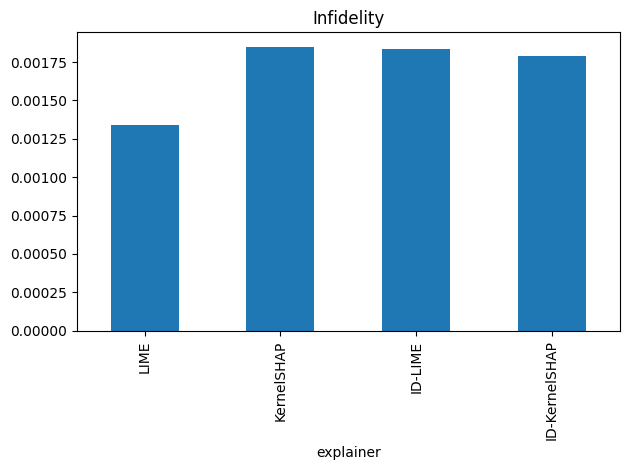

<Figure size 600x300 with 0 Axes>

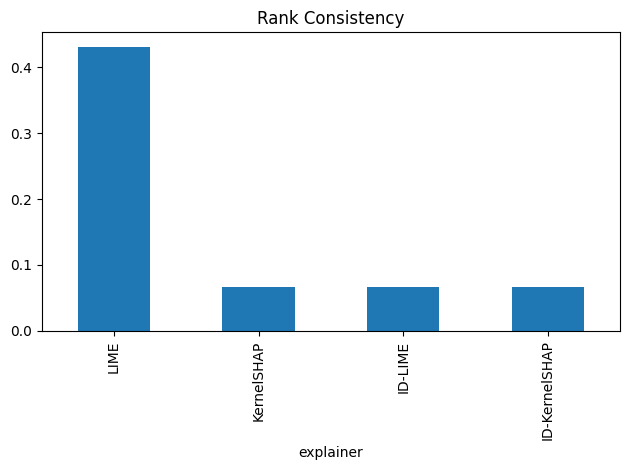

<Figure size 600x300 with 0 Axes>

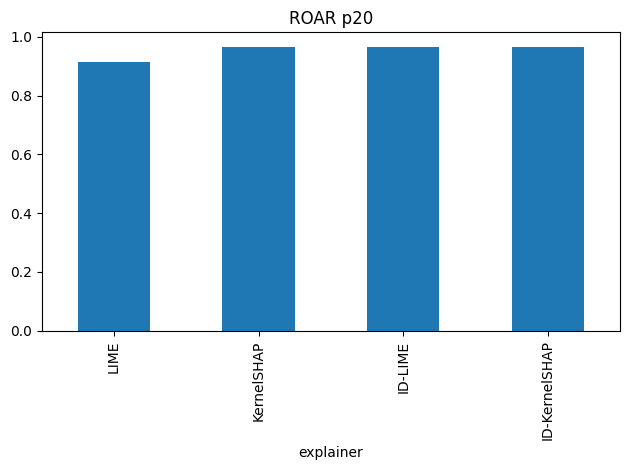

Saved pngs in results/ (cmp_infidelity_fixed.png, cmp_rank_fixed.png, cmp_roar_fixed.png)


In [101]:
# Run this in Colab (metrics + summary). Then paste the printed DataFrame here.
%cd /content/Capstone-P59
import numpy as np, pandas as pd, os
from scipy.stats import kendalltau
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

attack_folder = "attacked/adult/lr_attribution_age"

# load arrays (should exist from previous steps)
base_lime = np.load(os.path.join(attack_folder,"lime_explanations.npz"))['explanations']
base_kshap = np.load(os.path.join(attack_folder,"kernelshap_explanations.npz"))['explanations']
id_lime = np.load(os.path.join(attack_folder,"id_lime_explanations.npz"))['explanations']
id_kshap = np.load(os.path.join(attack_folder,"id_kernelshap_explanations.npz"))['explanations']

print("Shapes -> base_lime", base_lime.shape, "base_kshap", base_kshap.shape, "id_lime", id_lime.shape, "id_kshap", id_kshap.shape)

# compute counts of fallbacks/zeros (rough diagnostics)
def diag(arr):
    n = arr.shape[0]
    zeros = int(np.sum(np.all(arr==0, axis=1)))
    nanrows = int(np.sum(np.any(np.isnan(arr), axis=1)))
    return {"rows": n, "all-zero-rows": zeros, "rows-with-nans": nanrows}
print("Diagnostics:")
print("base_lime:", diag(base_lime))
print("base_kshap:", diag(base_kshap))
print("id_lime:", diag(id_lime))
print("id_kshap:", diag(id_kshap))

# metrics helpers
def compute_infidelity(est, X_num, expl, n_samples=30, max_samples=200, sigma=0.05):
    X = X_num[:min(len(X_num), expl.shape[0], max_samples)]
    N = X.shape[0]
    infs=[]
    for i in range(N):
        x = X[i]; e = expl[i]
        svals=[]
        for _ in range(n_samples):
            d = np.random.normal(0, sigma, size=x.shape)
            try:
                fx = est.predict_proba(x.reshape(1,-1))[0,1]
                fxp = est.predict_proba((x-d).reshape(1,-1))[0,1]
            except:
                fx = float(est.predict(x.reshape(1,-1))[0])
                fxp = float(est.predict((x-d).reshape(1,-1))[0])
            svals.append((np.dot(d,e) - (fx - fxp))**2)
        infs.append(np.mean(svals))
    return float(np.mean(infs))

def compute_rank_consistency(arr, sample_limit=100):
    n = min(arr.shape[0], sample_limit)
    taus=[]
    for i in range(n-1):
        t,_ = kendalltau(arr[i], arr[i+1])
        if not np.isnan(t): taus.append(t)
    return float(np.mean(taus)) if len(taus)>0 else float("nan")

def roar_kar(Xtr, Xte, ytr, yte, feat_imp, top_p=0.2):
    idx = np.argsort(-np.array(feat_imp))
    k = max(1, int(top_p * len(idx)))
    top = idx[:k]
    m1 = LogisticRegression(max_iter=300)
    m1.fit(np.delete(Xtr, top, axis=1), ytr)
    r = accuracy_score(yte, m1.predict(np.delete(Xte, top, axis=1)))
    m2 = LogisticRegression(max_iter=300)
    m2.fit(Xtr[:, top], ytr)
    kacc = accuracy_score(yte, m2.predict(Xte[:, top]))
    return r, kacc

# prepare train/test numeric for ROAR/KAR (fallback if split not present)
try:
    Xtr_num = np.load("data/adult/adult/X_train_num.npy")
    Xte_num = np.load("data/adult/adult/X_test_num.npy")
    ytr = np.load("data/adult/adult/y_train.npy")
    yte = np.load("data/adult/adult/y_test.npy")
    print("Loaded pre-saved train/test numeric")
except Exception:
    from sklearn.model_selection import train_test_split
    # fallback labels from estimator predictions (not ideal but reproducible)
    try:
        y_all = np.load("data/adult/adult/labels.npy")
    except:
        y_all = estimator.predict(X_num)
    Xtr_num, Xte_num, ytr, yte = train_test_split(X_num, y_all, test_size=0.2, random_state=42)
    print("Constructed fallback train/test split")

# align N to minimum available rows so comparisons are fair
N = min(base_lime.shape[0], base_kshap.shape[0], id_lime.shape[0], id_kshap.shape[0])
print("Using first N =", N, "samples for metrics\n")

rows=[]
expl_list=[("LIME", base_lime), ("KernelSHAP", base_kshap), ("ID-LIME", id_lime), ("ID-KernelSHAP", id_kshap)]
for name, arr in expl_list:
    arr2 = arr[:N]
    print("Computing:", name)
    inf = compute_infidelity(estimator, X_att_num, arr2)
    rk = compute_rank_consistency(arr2)
    feat_imp = np.mean(arr2, axis=0)
    roar, kar = roar_kar(Xtr_num, Xte_num, ytr, yte, feat_imp, top_p=0.2)
    rows.append({"explainer":name, "infidelity":inf, "rank_consistency":rk, "roar_p20":roar, "kar_p20":kar})

df = pd.DataFrame(rows)
print("\nFinal comparison table:\n")
print(df)
df.to_excel(os.path.join("results","comparison_fixed_pipeline.xlsx"), index=False)
print("\nSaved comparison_fixed_pipeline.xlsx in results/")
# quick plots
os.makedirs("results",exist_ok=True)
plt.figure(figsize=(6,3)); df.plot(x='explainer', y='infidelity', kind='bar', legend=False); plt.title("Infidelity"); plt.tight_layout(); plt.savefig("results/cmp_infidelity_fixed.png"); plt.show()
plt.figure(figsize=(6,3)); df.plot(x='explainer', y='rank_consistency', kind='bar', legend=False); plt.title("Rank Consistency"); plt.tight_layout(); plt.savefig("results/cmp_rank_fixed.png"); plt.show()
plt.figure(figsize=(6,3)); df.plot(x='explainer', y='roar_p20', kind='bar', legend=False); plt.title("ROAR p20"); plt.tight_layout(); plt.savefig("results/cmp_roar_fixed.png"); plt.show()
print("Saved pngs in results/ (cmp_infidelity_fixed.png, cmp_rank_fixed.png, cmp_roar_fixed.png)")


In [6]:
!git config --global user.email "aaravagarwalpune@gmail.com"
!git config --global user.name "aarav-08"


In [7]:
!git clone https://github.com/Siddheshdumre/Capstone-P59.git


Cloning into 'Capstone-P59'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 241 (delta 38), reused 236 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (241/241), 24.58 MiB | 17.75 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Filtering content: 100% (9/9), 208.95 MiB | 39.13 MiB/s, done.


In [8]:
%cd /content/Capstone-P59


/content/Capstone-P59


In [15]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [23]:
!cp "/content/drive/MyDrive/Colab Notebooks/Capstonefinal.ipynb" /content/Capstone-P59/


In [24]:
%cd /content/Capstone-P59
!git add Capstonefinal.ipynb
!git commit -m "Added Capstonefinal notebook"
!git push


/content/Capstone-P59
[main 239f9d4] Added Capstonefinal notebook
 1 file changed, 1 insertion(+)
 create mode 100644 Capstonefinal.ipynb
fatal: could not read Username for 'https://github.com': No such device or address
